*Este proyecto hace parte del requisito de finalización del Bootcamp Talento Tech en Inteligencia Artificial nivel Intermedio otorgado por el Ministerio de Tecnologías de la Información y Comunicaciones de Colombia entre agosto y noviembre de 2024*

Por: Javier Luis Ricaurte Peña

#Bibliotecas

In [ ]:
#Estas serán todas las bibliotecas usadas en el proyecto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

#Resumen

*Con este proyecto se intentan aportar perspectivas análiticas a procesos sociales usando el Machine Learning y las Redes Neuronales como herramientas de investigación.*


---

Este trabajo corresponde a un esfuerzo por responder a la  pregunta de ¿Cómo determinar el éxito del proceso de reintegración a la vida civil de un ex combatiente de grupos armados ilegales en Colombia?

Lo primero será recolectar los datos que nos puedan brindar información pertinente. Para ello se analizará el dataset disponible en Datos Abiertos "[ESTADÍSTICAS DE LAS PERSONAS DESMOVILIZADAS QUE HAN INGRESADO AL PROCESO DE REINTEGRACIÓN](https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/ESTAD-STICAS-DE-LAS-PERSONAS-DESMOVILIZADAS-QUE-HA/39pj-dba6/about_data)", a corte de septiembre 2024, de la Agencia para la Reincorporación y la Normalización (ARN).

La ARN es la agencia gubernamental que se encarga de registrar y llevar el proceso de reintegración a la vida civil de los desmovilizados desde hace veinte años. [En sus palabras](https://www.reincorporacion.gov.co/es/agencia), la ARN "implementa y articula políticas públicas y programas de reinserción, reintegración y reincorporación de personas o colectivos que hicieron parte de grupos armados ilegales u organizados, con un enfoque territorial y comunitario, respetuoso de la diversidad étnica, cultural y social del país".

El objetivo principal es crear una red neuronal de clasificación supervisada para determinar la **situación final frente al proceso** de una persona (Culminado o Fuera del Proceso) a partir de las variables disponibles entre las que se incluyen beneficios entregados por la agencia, factores demográficos y socioeconómicos, y caracterísiticas del proceso de desmovilización de cada individuo.

En un primer instante se hará un análisis exploratorio de los datos (EDA) para describir y entender el comportamiento de las variables presentes en el dataset, y también para reducir el tamaño de los datos filtrando solo aquellos  registros y variables necesarias.

Posterior a ello, se dividiran los datos en sets de entrenamiento, validación y prueba, y se entrenará una red neuronal para realizar la clasificación. Finalmente se evaluará el modelo y se expondrán las métricas que permitan elaborar una conclusión.


#EDA

##Descripción del dataset

In [ ]:
#cargar el dataset y convertirlo en dataframe
df = pd.read_csv("/content/ESTAD_STICAS_DE_LAS_PERSONAS_DESMOVILIZADAS_QUE_HAN_INGRESADO_AL_PROCESO_DE_REINTEGRACI_N_20241019.csv")
pd.set_option('display.max_columns', None)
df.head()

Tipo de Desmovilización Ex Grupo  Año desmovilización Ingresó/No ingresó  \
0              Individual     FARC                 2010                 Sí   
1               Colectiva      AUC                 2003                 Sí   
2               Colectiva      AUC                 2006                 Sí   
3               Colectiva      AUC                 2006                 Sí   
4               Colectiva      AUC                 2005                 Sí   

   Año de Independización/Ingreso        Grupo Etario       Sexo  \
0                            2010  Entre 26 y 40 años   FEMENINO   
1                            2003  Entre 41 y 60 años  MASCULINO   
2                            2006  Entre 41 y 60 años  Masculino   
3                            2006  Entre 41 y 60 años  Masculino   
4                            2005  Entre 41 y 60 años  MASCULINO   

  Situación Final frente al proceso Departamento de residencia  \
0                         Culminado                Bogotá D.C.   
1                         Culminado                  Antioquia   
2                         Culminado                    Córdoba   
3                         Culminado                  Santander   
4                         Culminado                    Córdoba   

  Municipio de residencia BeneficioTRV BeneficioFA BeneficioFPT BeneficioPDT  \
0                  Bogotá           No          No           No           No   
1                Medellín           No          No           No           No   
2                Valencia           No          No           No           No   
3         Barrancabermeja           No          No           No           No   
4                Montería           No          No           No           No   

     Nivel Educativo Máximo Nivel FpT Reportado  \
0          Bachiller                    Técnico   
1          Bachiller                <No Aplica>   
2          Bachiller             Semicalificado   
3    Básica Primaria             Complementario   
4  Básica Secundaria             Complementario   

  Línea de FpT para el Máx. Nivel              OcupacionEconomica  \
0                           SALUD  Ocupados en el sector Informal   
1                     <No Aplica>  Ocupados en el sector Informal   
2  MECANICA AUTOMOTRIZ Y DE MOTOS  Ocupados en el sector Informal   
3                           OTROS  Ocupados en el sector Informal   
4                    AGROPECUARIA  Ocupados en el sector Informal   

  Desembolso BIE Tipo de BIE Accedido DesagregadoDesembolsoBIE  \
0             Sí      Plan de Negocio     Posee desembolso BIE   
1             Sí      Plan de Negocio     Posee desembolso BIE   
2             Sí      Plan de Negocio     Posee desembolso BIE   
3             Sí      Plan de Negocio     Posee desembolso BIE   
4             Sí      Plan de Negocio     Posee desembolso BIE   

         Estado ISUN                  Posee Servicio Social?  \
0            Cerrado  Posee Certificación de Servicio Social   
1  En Funcionamiento  Posee Certificación de Servicio Social   
2            Cerrado  Posee Certificación de Servicio Social   
3  En Funcionamiento  Posee Certificación de Servicio Social   
4            Cerrado  Posee Certificación de Servicio Social   

  Estado de la vinculación ASS  \
0                  Certificado   
1                  Certificado   
2                  Certificado   
3                  Certificado   
4                  Certificado   

                               Tipo de ASS Vinculada Posee Censo de Familia?  \
0  Acompañamiento a la atención en Salud y atenci...                      Sí   
1                 Embellecimiento de Espacio Publico                      Sí   
2  Aporte de habilidades Especiales que le partic...                      Sí   
3                 Embellecimiento de Espacio Publico                      Sí   
4  Generación de espacios de recreación, Arte, Cu...                      Sí   

  Posee Cónyuge o Compañero(a)?  N° de Hijos  \
0       

In [ ]:
#describir su forma
df.shape

(56238, 37)

In [ ]:
df.dtypes.value_counts() #Describir el tipo de los datos

object    31
int64      6
Name: count, dtype: int64

In [ ]:
#buscar valores nulos
df.isnull().any()

Tipo de Desmovilización                False
Ex Grupo                               False
Año desmovilización                    False
Ingresó/No ingresó                     False
Año de Independización/Ingreso         False
Grupo Etario                           False
Sexo                                   False
Situación Final frente al proceso      False
Departamento de residencia             False
Municipio de residencia                False
BeneficioTRV                           False
BeneficioFA                            False
BeneficioFPT                           False
BeneficioPDT                           False
Nivel Educativo                        False
Máximo Nivel FpT Reportado             False
Línea de FpT para el Máx. Nivel        False
OcupacionEconomica                     False
Desembolso BIE                         False
Tipo de BIE Accedido                   False
DesagregadoDesembolsoBIE               False
Estado ISUN                            False
Posee Servicio Social?                 False
Estado de la vinculación ASS           False
Tipo de ASS Vinculada                  False
Posee Censo de Familia?                False
Posee Cónyuge o Compañero(a)?          False
N° de Hijos                            False
Total Integrantes grupo familiar       False
Posee Censo de Habitabilidad?          False
Tipo de Vivienda                       False
Régimen de tenencia Vivienda           False
Posee Serv. Públicos Básicos           False
Régimen de salud                       False
Clasificación Componente Específico    False
FechaCorte                             False
FechaActualizacion                     False
dtype: bool

Nos damos cuenta que nuestro conjunto de datos se compone de 56.238 filas y 37 columnas. De estas últimas tenemos 31 de tipo Object, lo que indica que son categoricas, y 6 de tipo númerico. También nos damos cuenta de que no poseemos valores nulos.

##Filtrar filas
Empezamos a delimitar el objeto de estudio escogiendo los registros que vamos a analizar.

Para este estudio necesitamos reducir los datos solamente a la población que:
  * a) Ingresó al programa.
  * b) Culminó el programa, bien sea con exito o abandonándolo.

In [ ]:
#Eliminar registros de personas que no ingresaron al programa, pues no son relevantes para el análisis
preprocessed_df = df[df["Ingresó/No ingresó"] != "No"]
preprocessed_df.shape

(53591, 37)

In [ ]:
#Explorar el número de posibles situaciones frente al proceso y definir solo aquellas que implican que la persona ya no está en el proceso
situación_unicos = preprocessed_df['Situación Final frente al proceso'].unique()
print(situación_unicos)

['Culminado' 'Fuera del Proceso' 'Ausente del proceso' 'En Proceso']


In [ ]:
#Escoger valores relevantes
valores_a_filtrar = ['Culminado', 'Fuera del Proceso']
processed_df = preprocessed_df[df["Situación Final frente al proceso"].isin(valores_a_filtrar)]

<ipython-input-8-3adfa390e19d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  processed_df = preprocessed_df[df["Situación Final frente al proceso"].isin(valores_a_filtrar)]


In [ ]:
processed_df.shape

(48163, 37)

##Identificar variables con alta cardinalidad

In [ ]:
#Seleccionar las columnas categóricas
columnas_categoricas = processed_df.select_dtypes(include=['object']).columns
#Calcular la cardinalidad
cardinalidad = processed_df[columnas_categoricas].nunique()
#Identificar variables con alta cardinalidad
variables_alta_cardinalidad = cardinalidad[cardinalidad >= 10].index

print("Variables con alta cardinalidad:")
for variable in variables_alta_cardinalidad:
  print(variable)

Variables con alta cardinalidad:
Departamento de residencia
Municipio de residencia
Máximo Nivel FpT Reportado
Línea de FpT para el Máx. Nivel
Tipo de Vivienda
Régimen de tenencia Vivienda


##Explorar la frecuencia y distribución de las variables categoricas:

Frecuencia de la variable 'Tipo de Desmovilización':
Tipo de Desmovilización
Colectiva     26783
Individual    21380
Name: count, dtype: int64

Porcentaje de la variable 'Tipo de Desmovilización':
Tipo de Desmovilización
Colectiva     55.609078
Individual    44.390922
Name: proportion, dtype: float64



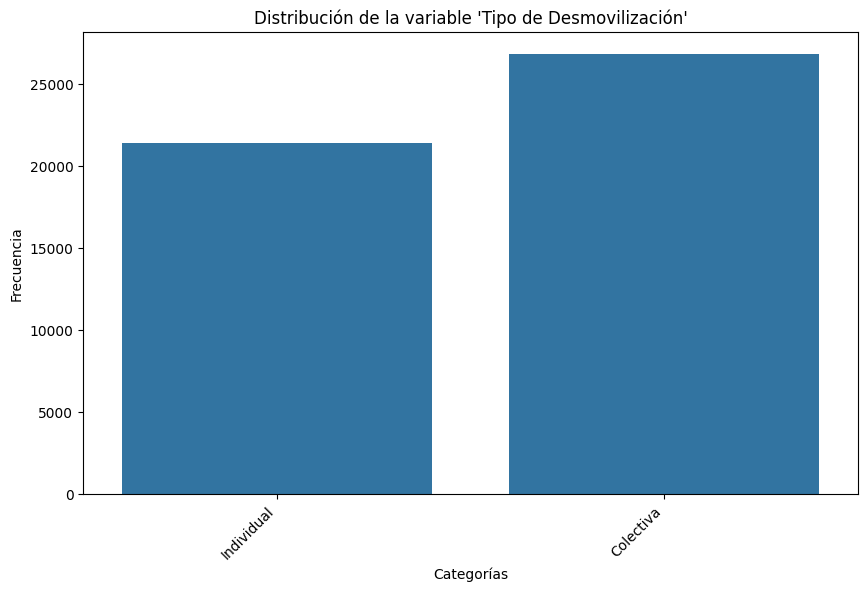

Frecuencia de la variable 'Ex Grupo':
Ex Grupo
AUC                    28921
FARC                   15670
ELN                     3192
ERP                      152
ERG                      126
EPL                       82
SIN DATO                  13
SIN DATO MINDEFENSA        7
Name: count, dtype: int64

Porcentaje de la variable 'Ex Grupo':
Ex Grupo
AUC                    60.048170
FARC                   32.535349
ELN                     6.627494
ERP                     0.315595
ERG                     0.261612
EPL                     0.170255
SIN DATO                0.026992
SIN DATO MINDEFENSA     0.014534
Name: proportion, dtype: float64



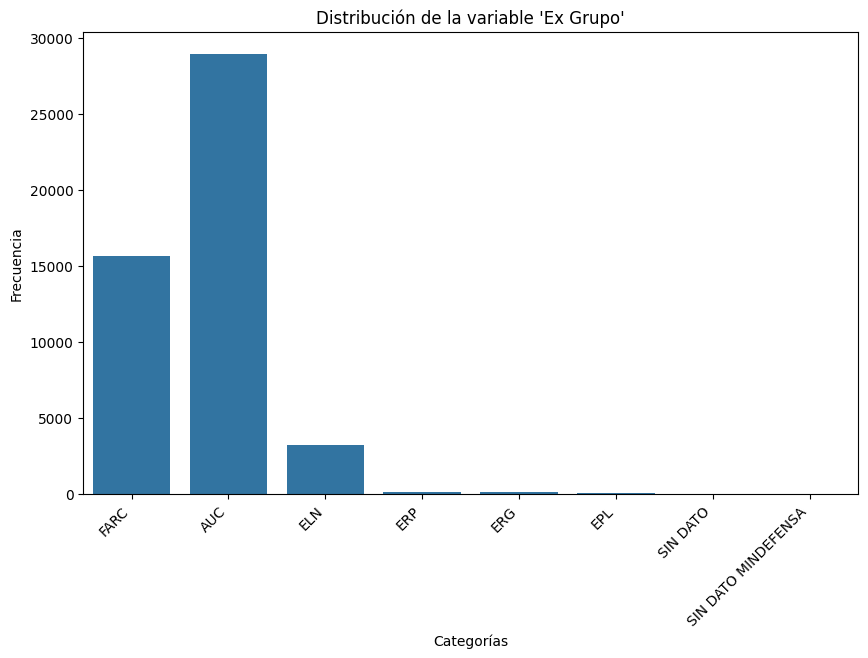

Frecuencia de la variable 'Ingresó/No ingresó':
Ingresó/No ingresó
Sí    48163
Name: count, dtype: int64

Porcentaje de la variable 'Ingresó/No ingresó':
Ingresó/No ingresó
Sí    100.0
Name: proportion, dtype: float64



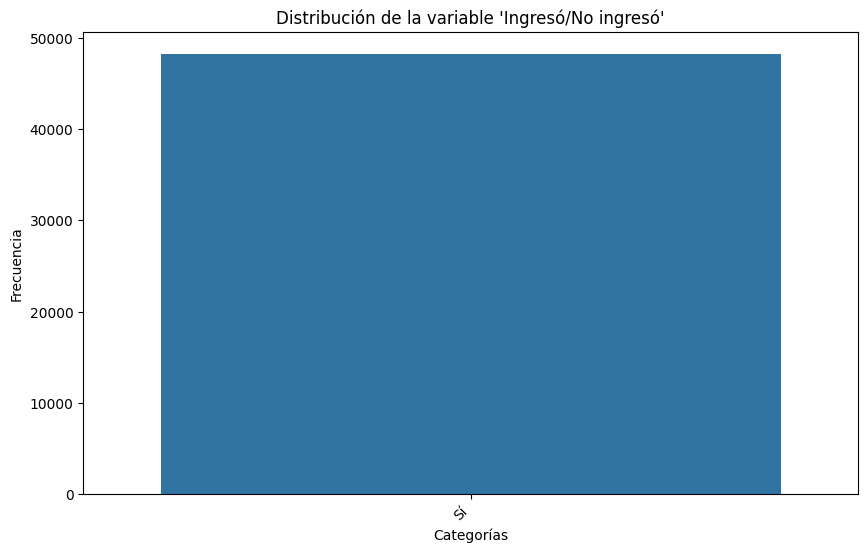

Frecuencia de la variable 'Grupo Etario':
Grupo Etario
Entre 41 y 60 años    29340
Entre 26 y 40 años    16646
Mayor de 60 años       2005
Entre 18 y 25 años      127
<No Registra>            45
Name: count, dtype: int64

Porcentaje de la variable 'Grupo Etario':
Grupo Etario
Entre 41 y 60 años    60.918132
Entre 26 y 40 años    34.561801
Mayor de 60 años       4.162947
Entre 18 y 25 años     0.263688
<No Registra>          0.093433
Name: proportion, dtype: float64



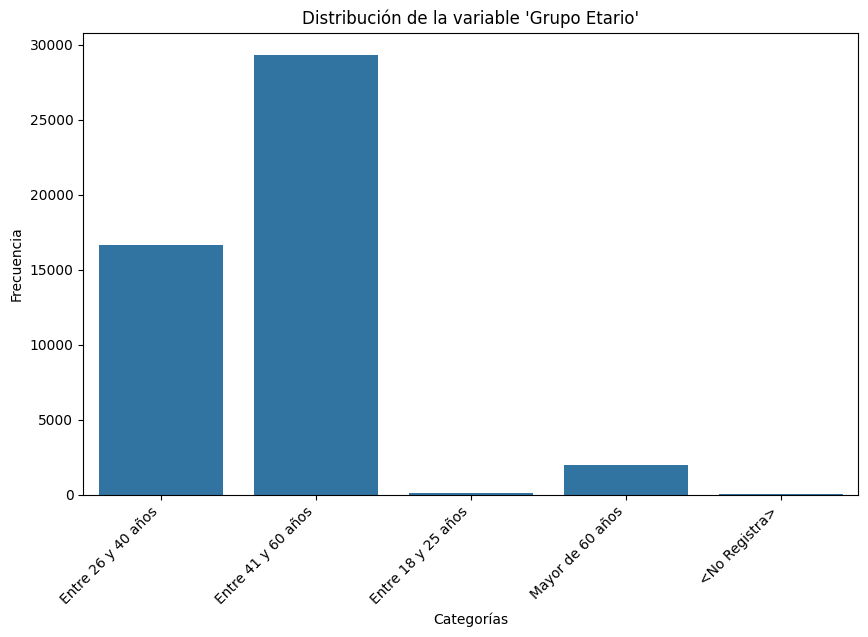

Frecuencia de la variable 'Sexo':
Sexo
MASCULINO    29145
Masculino    12321
FEMENINO      5147
Femenino      1550
Name: count, dtype: int64

Porcentaje de la variable 'Sexo':
Sexo
MASCULINO    60.513257
Masculino    25.581878
FEMENINO     10.686627
Femenino      3.218238
Name: proportion, dtype: float64



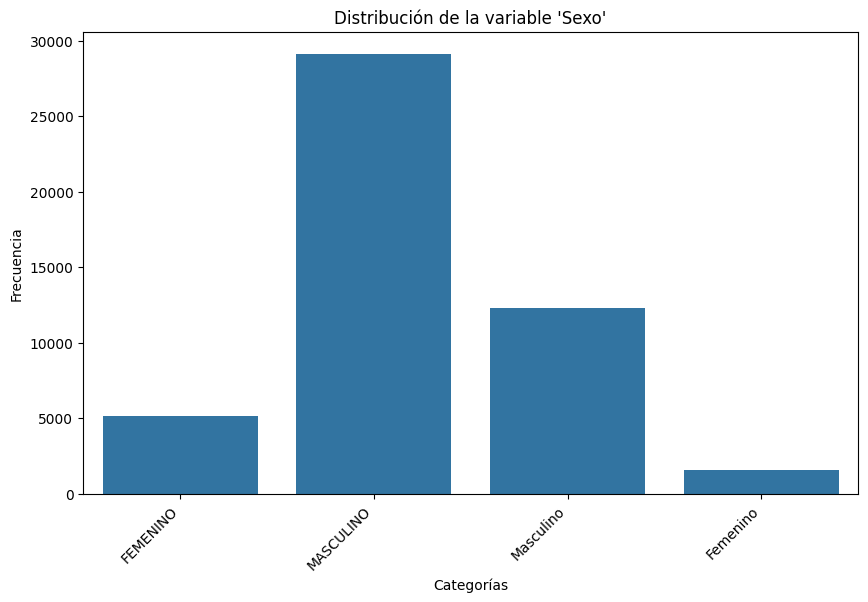

Frecuencia de la variable 'Situación Final frente al proceso':
Situación Final frente al proceso
Culminado            28245
Fuera del Proceso    19918
Name: count, dtype: int64

Porcentaje de la variable 'Situación Final frente al proceso':
Situación Final frente al proceso
Culminado            58.644603
Fuera del Proceso    41.355397
Name: proportion, dtype: float64



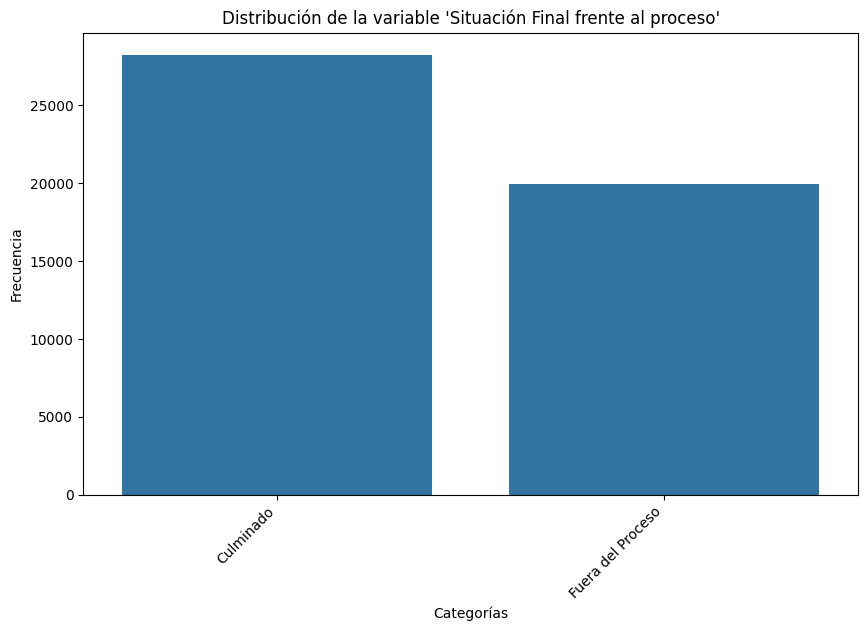

Frecuencia de la variable 'Departamento de residencia':
Departamento de residencia
Antioquia                                                   10825
Bogotá D.C.                                                  4865
Córdoba                                                      2966
Meta                                                         2883
Cesar                                                        2717
Valle del Cauca                                              2496
Santander                                                    2070
Magdalena                                                    1844
Cundinamarca                                                 1609
Tolima                                                       1225
Atlántico                                                    1215
Bolívar                                                      1204
Huila                                                        1177
Norte de Santander                                         

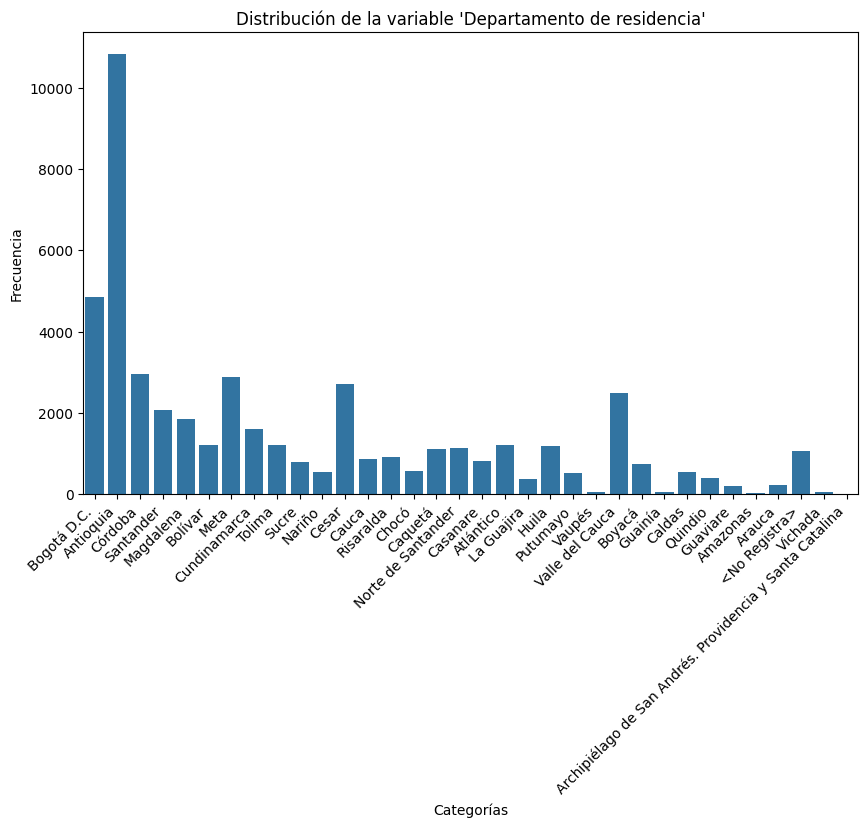

Frecuencia de la variable 'Municipio de residencia':
Municipio de residencia
Bogotá           4865
Medellín         4742
Villavicencio    1489
Montería         1438
Cali             1408
                 ... 
Agua De Dios        1
Palmar              1
Iles                1
Guavatá             1
Arbeláez            1
Name: count, Length: 854, dtype: int64

Porcentaje de la variable 'Municipio de residencia':
Municipio de residencia
Bogotá           10.101115
Medellín          9.845732
Villavicencio     3.091585
Montería          2.985694
Cali              2.923406
                   ...    
Agua De Dios      0.002076
Palmar            0.002076
Iles              0.002076
Guavatá           0.002076
Arbeláez          0.002076
Name: proportion, Length: 854, dtype: float64



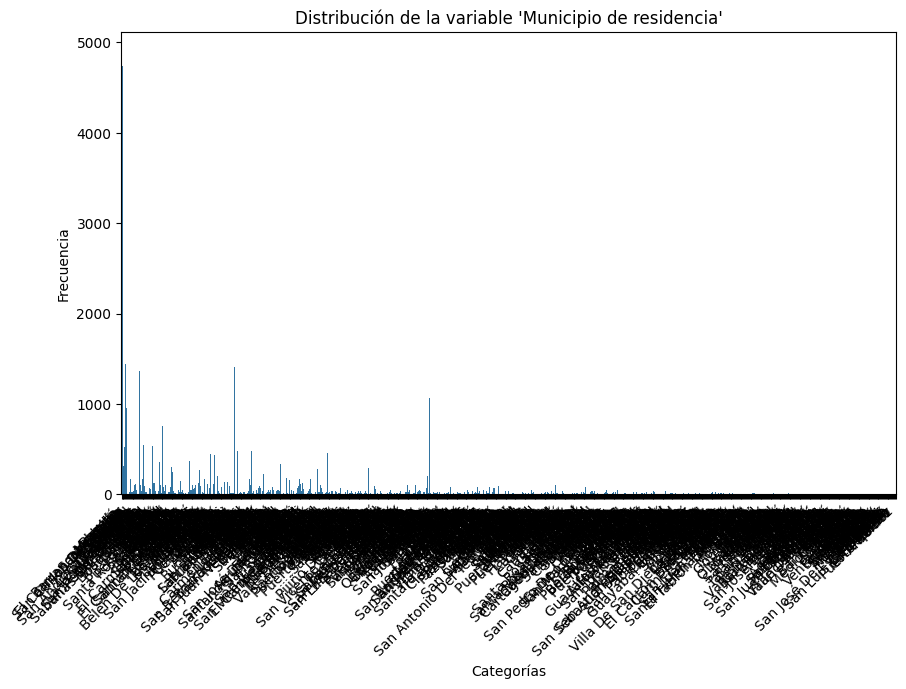

Frecuencia de la variable 'BeneficioTRV':
BeneficioTRV
No    47705
Sí      458
Name: count, dtype: int64

Porcentaje de la variable 'BeneficioTRV':
BeneficioTRV
No    99.049063
Sí     0.950937
Name: proportion, dtype: float64



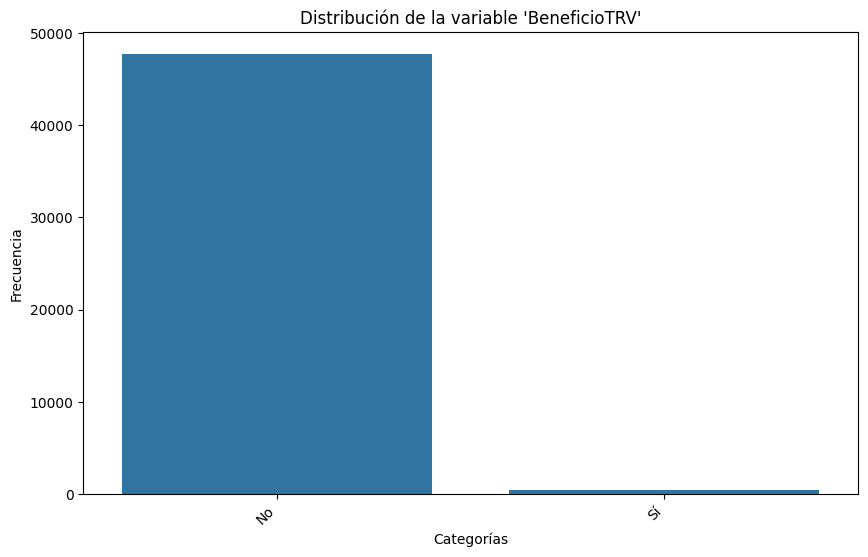

Frecuencia de la variable 'BeneficioFA':
BeneficioFA
No    48150
Sí       13
Name: count, dtype: int64

Porcentaje de la variable 'BeneficioFA':
BeneficioFA
No    99.973008
Sí     0.026992
Name: proportion, dtype: float64



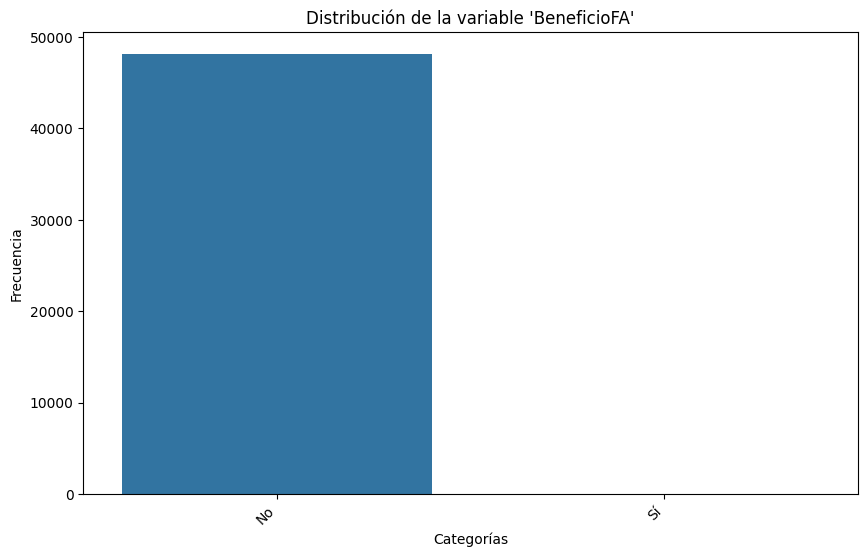

Frecuencia de la variable 'BeneficioFPT':
BeneficioFPT
No    48160
Sí        3
Name: count, dtype: int64

Porcentaje de la variable 'BeneficioFPT':
BeneficioFPT
No    99.993771
Sí     0.006229
Name: proportion, dtype: float64



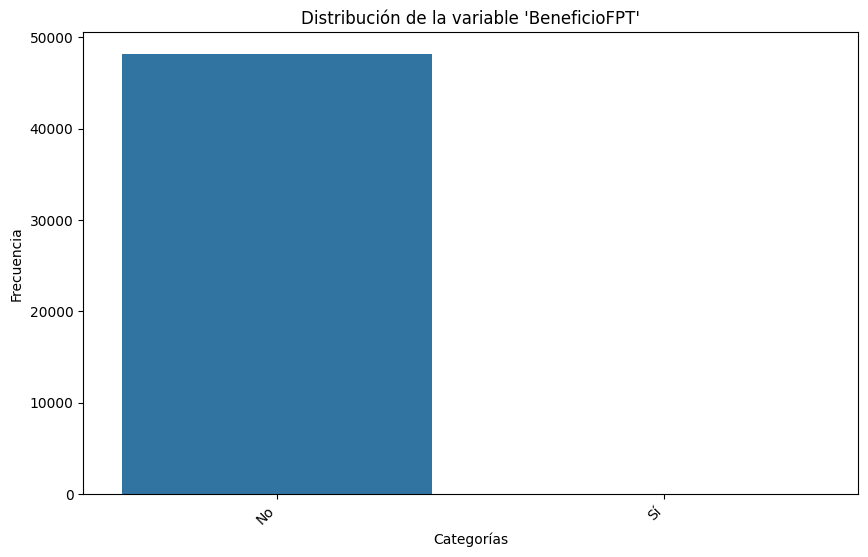

Frecuencia de la variable 'BeneficioPDT':
BeneficioPDT
No    47613
Sí      550
Name: count, dtype: int64

Porcentaje de la variable 'BeneficioPDT':
BeneficioPDT
No    98.858045
Sí     1.141955
Name: proportion, dtype: float64



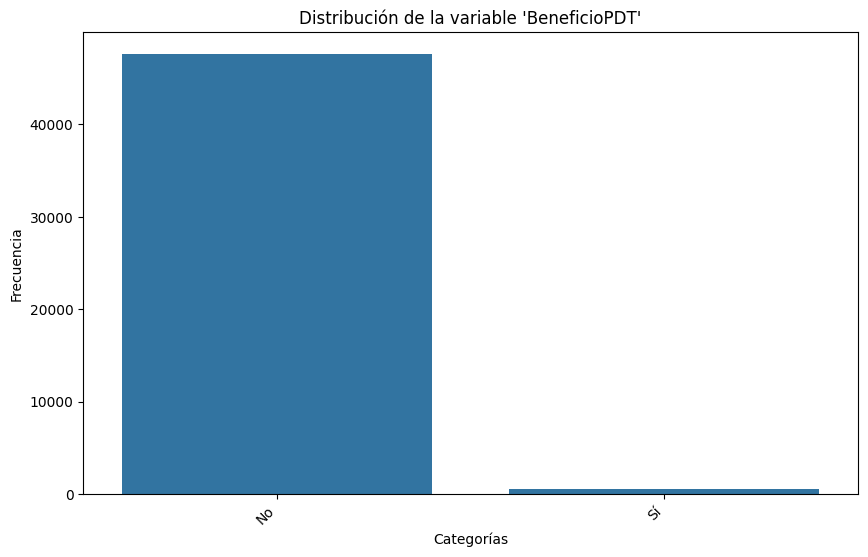

Frecuencia de la variable 'Nivel Educativo':
Nivel Educativo
Bachiller            16305
Básica Primaria      13531
Básica Secundaria     7530
Por Establecer        7216
Alfabetización        3581
Name: count, dtype: int64

Porcentaje de la variable 'Nivel Educativo':
Nivel Educativo
Bachiller            33.853788
Básica Primaria      28.094180
Básica Secundaria    15.634408
Por Establecer       14.982455
Alfabetización        7.435168
Name: proportion, dtype: float64



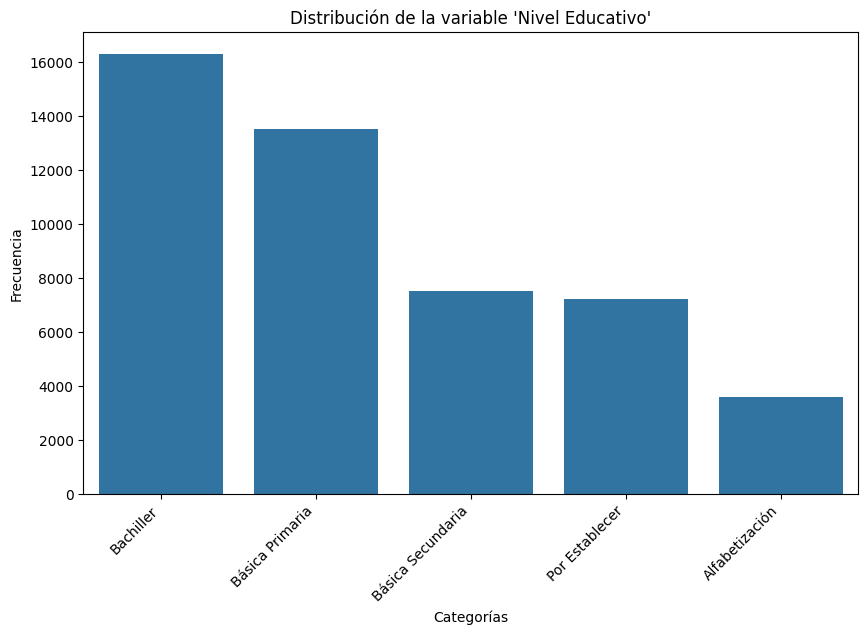

Frecuencia de la variable 'Máximo Nivel FpT Reportado':
Máximo Nivel FpT Reportado
<No Aplica>                                     21111
Técnico                                          8899
Complementario                                   7820
Semicalificado                                   6644
Tecnológico                                      2338
Transversal                                       555
Operario                                          520
Auxiliar                                          182
Técnico Profesional                                77
Técnico Laboral                                     8
Especialización Tecnológica                         3
Técnico Laboral por Competencias                    2
Certificación por Evaluación de Competencias        2
Especialización Técnica                             2
Name: count, dtype: int64

Porcentaje de la variable 'Máximo Nivel FpT Reportado':
Máximo Nivel FpT Reportado
<No Aplica>                                     43.

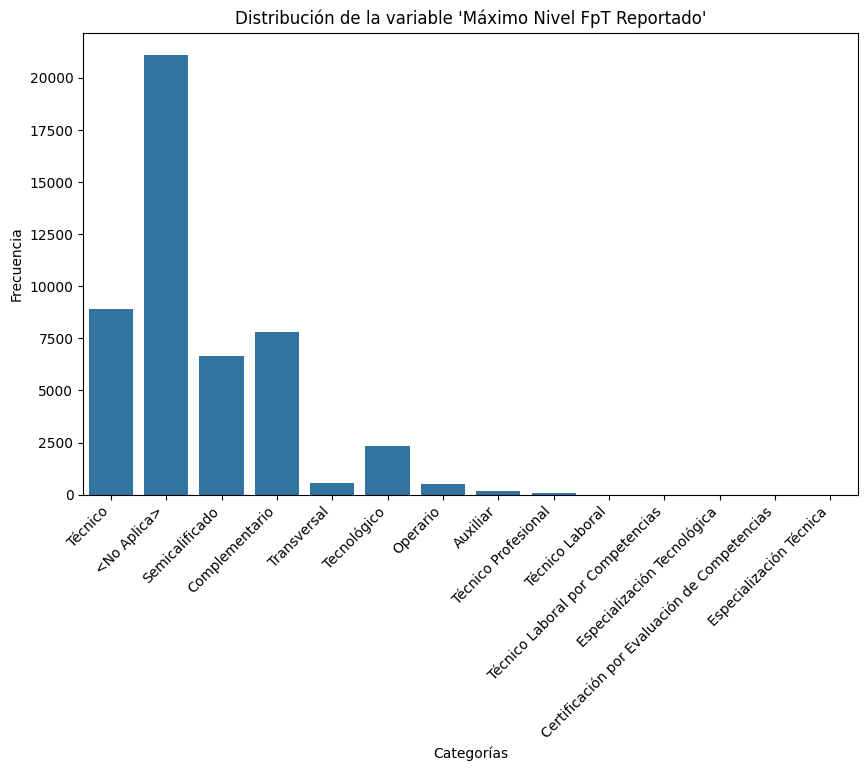

Frecuencia de la variable 'Línea de FpT para el Máx. Nivel':
Línea de FpT para el Máx. Nivel
<No Aplica>                                    21111
AGROPECUARIA                                    4344
FINANZAS Y ADMINISTRACION                       2945
<No Registra>                                   2728
MERCADEO Y VENTAS                               2401
ALIMENTOS Y BEBIDAS                             1842
SISTEMAS                                        1807
MECANICA AUTOMOTRIZ Y DE MOTOS                  1684
OTROS                                           1533
SERVICIOS                                       1174
CONSTRUCCION                                    1042
SALUD                                            985
CONFECCION, MARROQUINERIA Y CALZADO              748
MECANICA INDUSTRIAL                              714
ELECTRICIDAD                                     600
ESTETICA                                         461
TRANSVERSAL                                      443
CARPIN

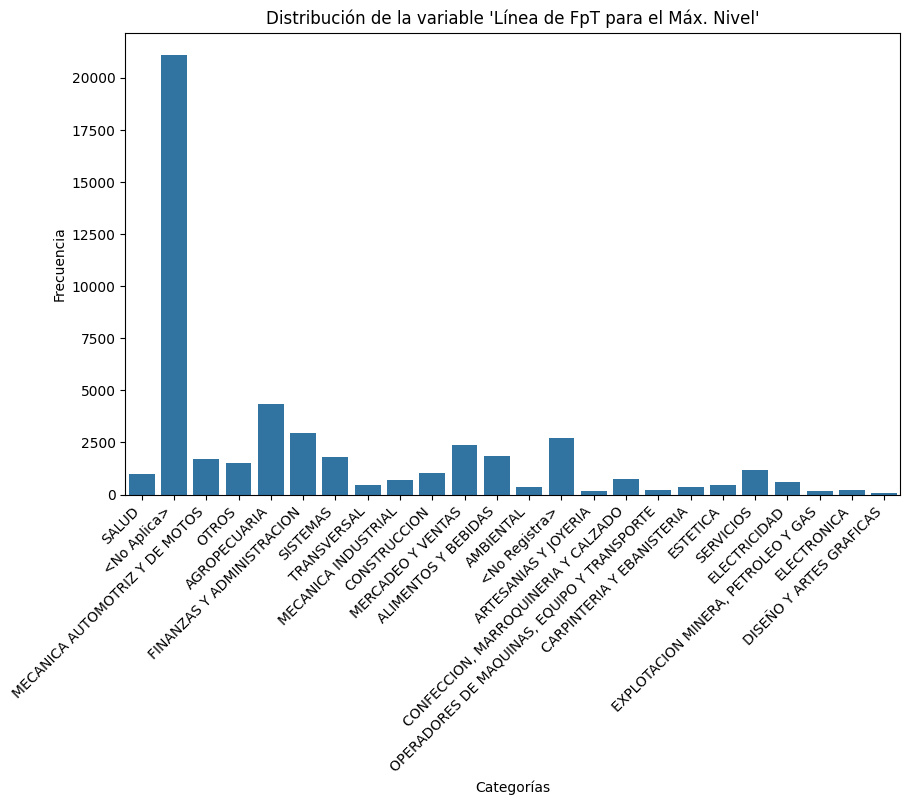

Frecuencia de la variable 'OcupacionEconomica':
OcupacionEconomica
Ocupados en el sector Informal       25605
<No Registra>                        10079
No Aplica                             5229
Población Económicamente Inactiva     4328
Desocupados                           2922
Name: count, dtype: int64

Porcentaje de la variable 'OcupacionEconomica':
OcupacionEconomica
Ocupados en el sector Informal       53.163217
<No Registra>                        20.926853
No Aplica                            10.856882
Población Económicamente Inactiva     8.986151
Desocupados                           6.066898
Name: proportion, dtype: float64



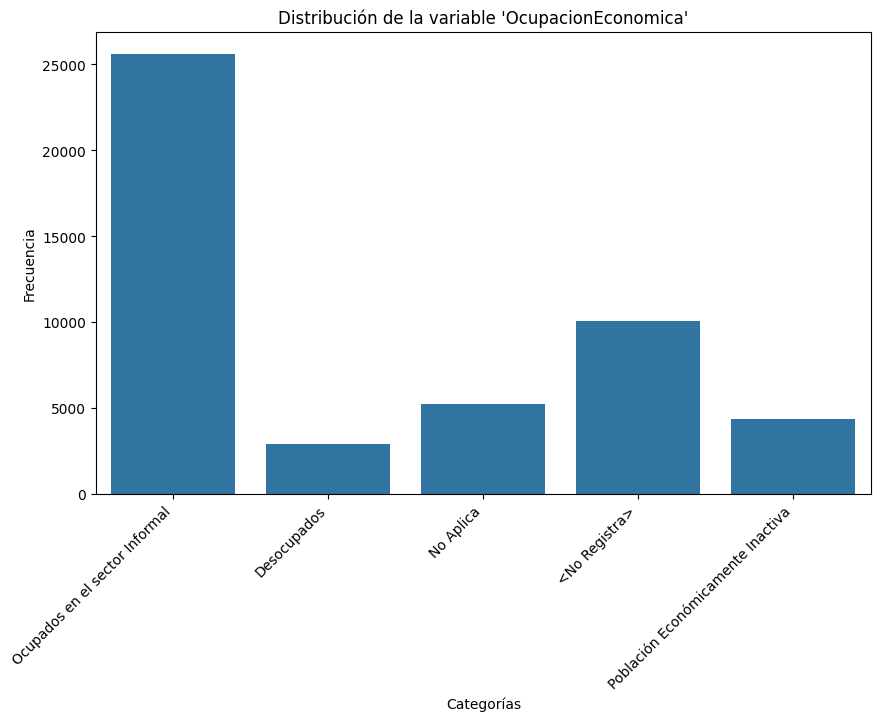

Frecuencia de la variable 'Desembolso BIE':
Desembolso BIE
Sí    26167
No    21996
Name: count, dtype: int64

Porcentaje de la variable 'Desembolso BIE':
Desembolso BIE
Sí    54.330087
No    45.669913
Name: proportion, dtype: float64



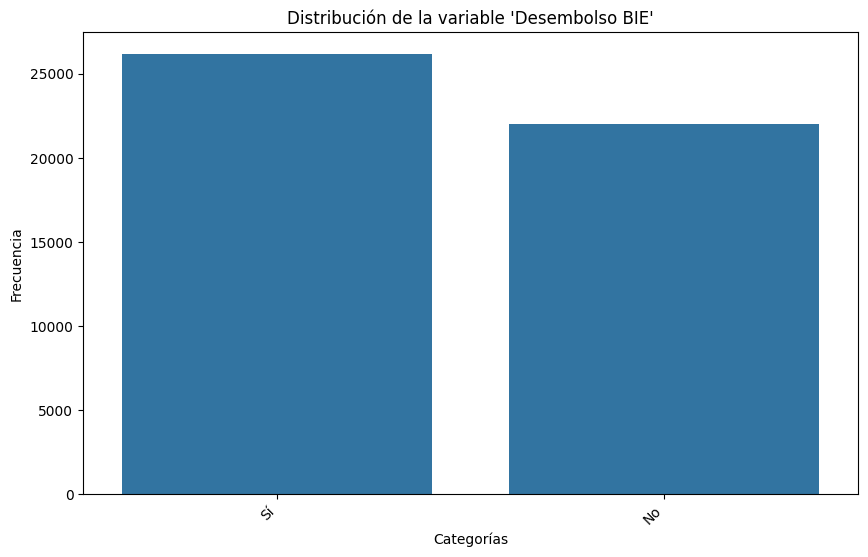

Frecuencia de la variable 'Tipo de BIE Accedido':
Tipo de BIE Accedido
Plan de Negocio       25415
<No Aplica>           21996
Vivienda                714
Educación Superior       38
Name: count, dtype: int64

Porcentaje de la variable 'Tipo de BIE Accedido':
Tipo de BIE Accedido
Plan de Negocio       52.768723
<No Aplica>           45.669913
Vivienda               1.482466
Educación Superior     0.078899
Name: proportion, dtype: float64



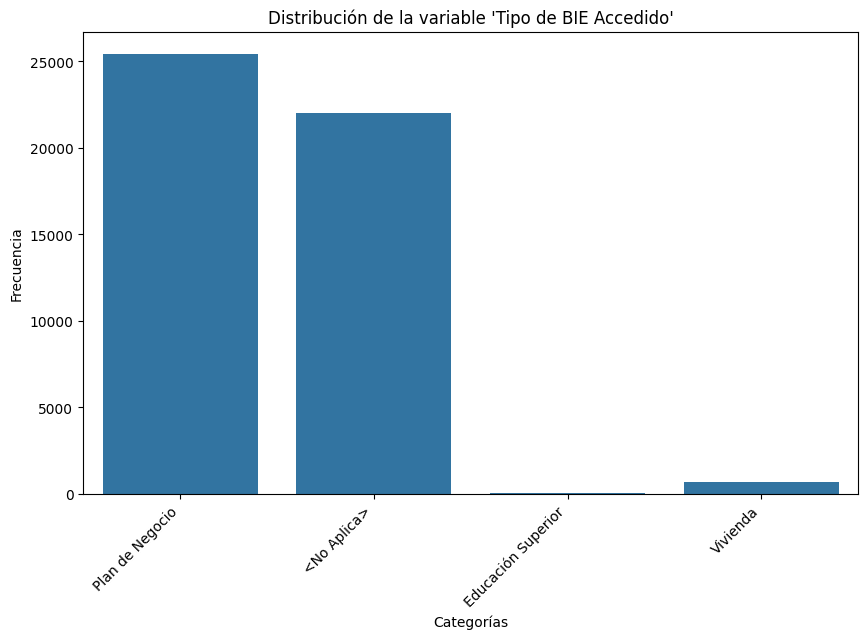

Frecuencia de la variable 'DesagregadoDesembolsoBIE':
DesagregadoDesembolsoBIE
Posee desembolso BIE                                      26167
No está en Proceso                                        16528
Culminado con agotamiento de tiempo para acceder a BIE     5367
Culminado sin agotamiento de tiempo para acceder a BIE      101
Name: count, dtype: int64

Porcentaje de la variable 'DesagregadoDesembolsoBIE':
DesagregadoDesembolsoBIE
Posee desembolso BIE                                      54.330087
No está en Proceso                                        34.316799
Culminado con agotamiento de tiempo para acceder a BIE    11.143409
Culminado sin agotamiento de tiempo para acceder a BIE     0.209705
Name: proportion, dtype: float64



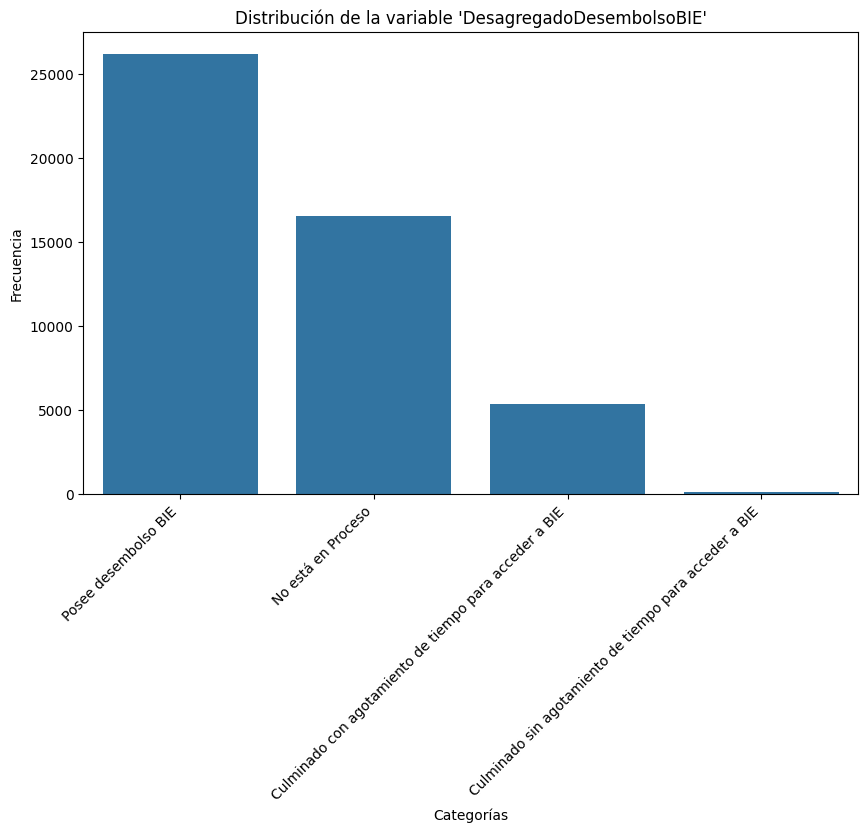

Frecuencia de la variable 'Estado ISUN':
Estado ISUN
<No Aplica>                  21997
En Funcionamiento            10666
Cerrado                       9465
Pendiente por visita ISUN     6035
Name: count, dtype: int64

Porcentaje de la variable 'Estado ISUN':
Estado ISUN
<No Aplica>                  45.671989
En Funcionamiento            22.145630
Cerrado                      19.652015
Pendiente por visita ISUN    12.530366
Name: proportion, dtype: float64



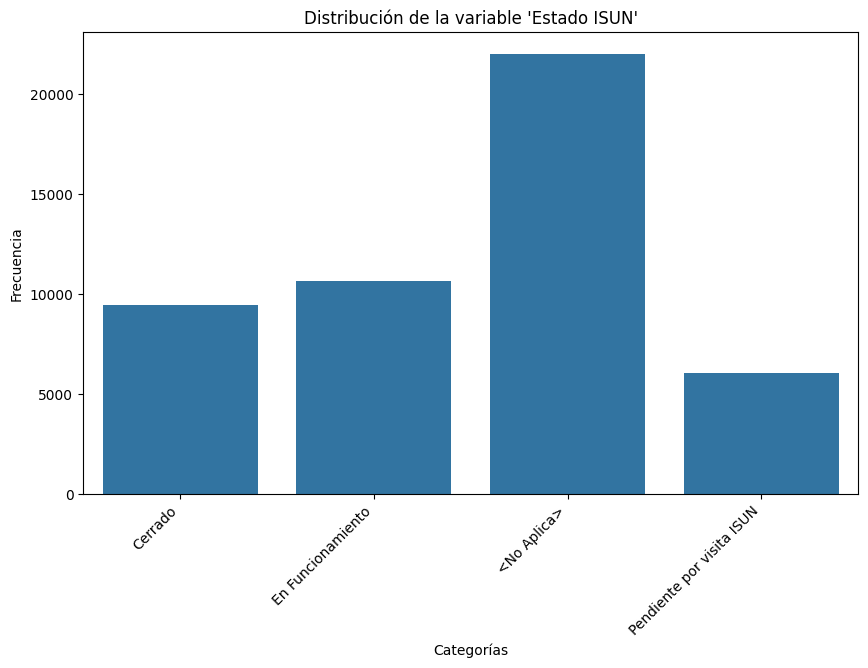

Frecuencia de la variable 'Posee Servicio Social?':
Posee Servicio Social?
Posee Certificación de Servicio Social      30447
No está vinculado a Servicio Social         17435
Se encuentra vinculado a Servicio Social      281
Name: count, dtype: int64

Porcentaje de la variable 'Posee Servicio Social?':
Posee Servicio Social?
Posee Certificación de Servicio Social      63.216577
No está vinculado a Servicio Social         36.199988
Se encuentra vinculado a Servicio Social     0.583435
Name: proportion, dtype: float64



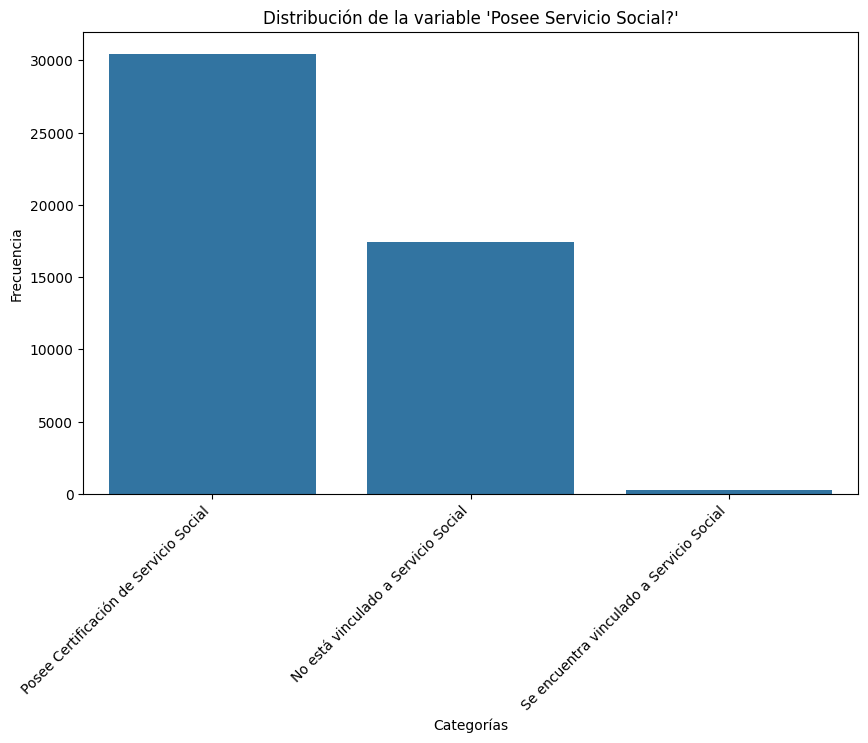

Frecuencia de la variable 'Estado de la vinculación ASS':
Estado de la vinculación ASS
Certificado                                                                  30447
<No Aplica>                                                                  16969
Vinculado                                                                      281
Abandono sin justa causa                                                       238
Abandono con justa causa                                                       197
No vinculado por limitaciones físicas o mentales permanentes certificadas       31
Name: count, dtype: int64

Porcentaje de la variable 'Estado de la vinculación ASS':
Estado de la vinculación ASS
Certificado                                                                  63.216577
<No Aplica>                                                                  35.232440
Vinculado                                                                     0.583435
Abandono sin justa causa                

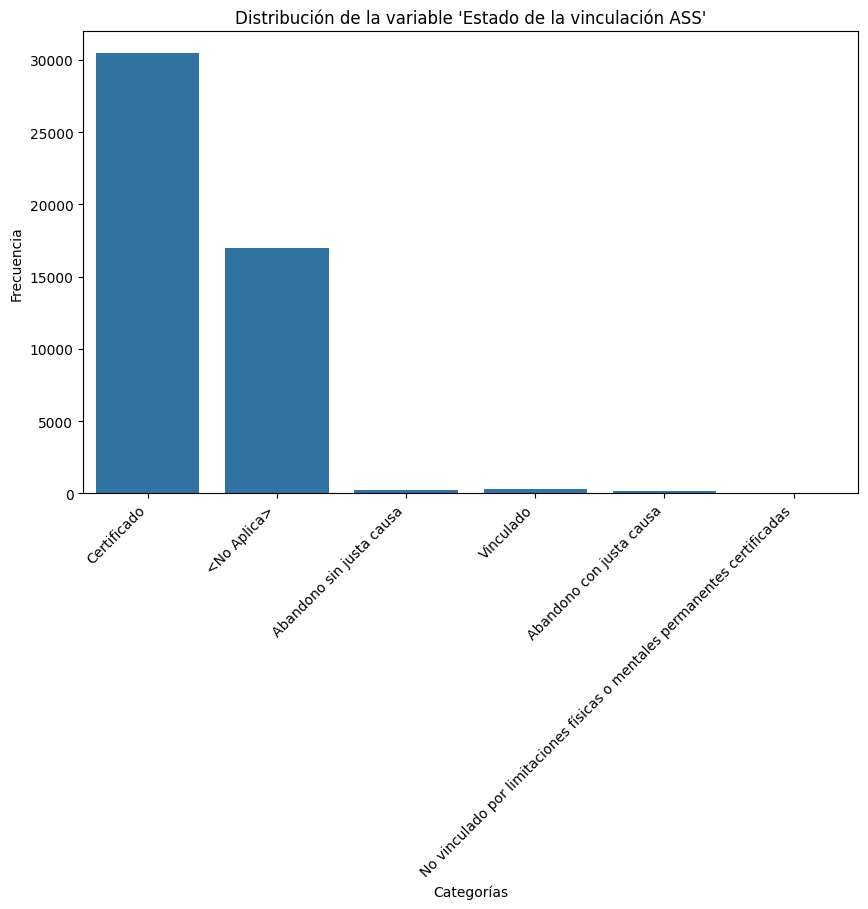

Frecuencia de la variable 'Tipo de ASS Vinculada':
Tipo de ASS Vinculada
<No Aplica>                                                                                 16969
Embellecimiento de Espacio Publico                                                          15874
Recuperación Ambiental                                                                       5624
Generación de espacios de recreación, Arte, Cultura y Deporte                                3795
Aporte de habilidades Especiales que le participante ponga a disposición de la comunidad     3062
Acompañamiento a la atención en Salud y atención Alimentaria a comunidades vulnerables       1718
Multiplicadores del Conocimiento                                                             1121
Name: count, dtype: int64

Porcentaje de la variable 'Tipo de ASS Vinculada':
Tipo de ASS Vinculada
<No Aplica>                                                                                 35.232440
Embellecimiento de Espacio Publico     

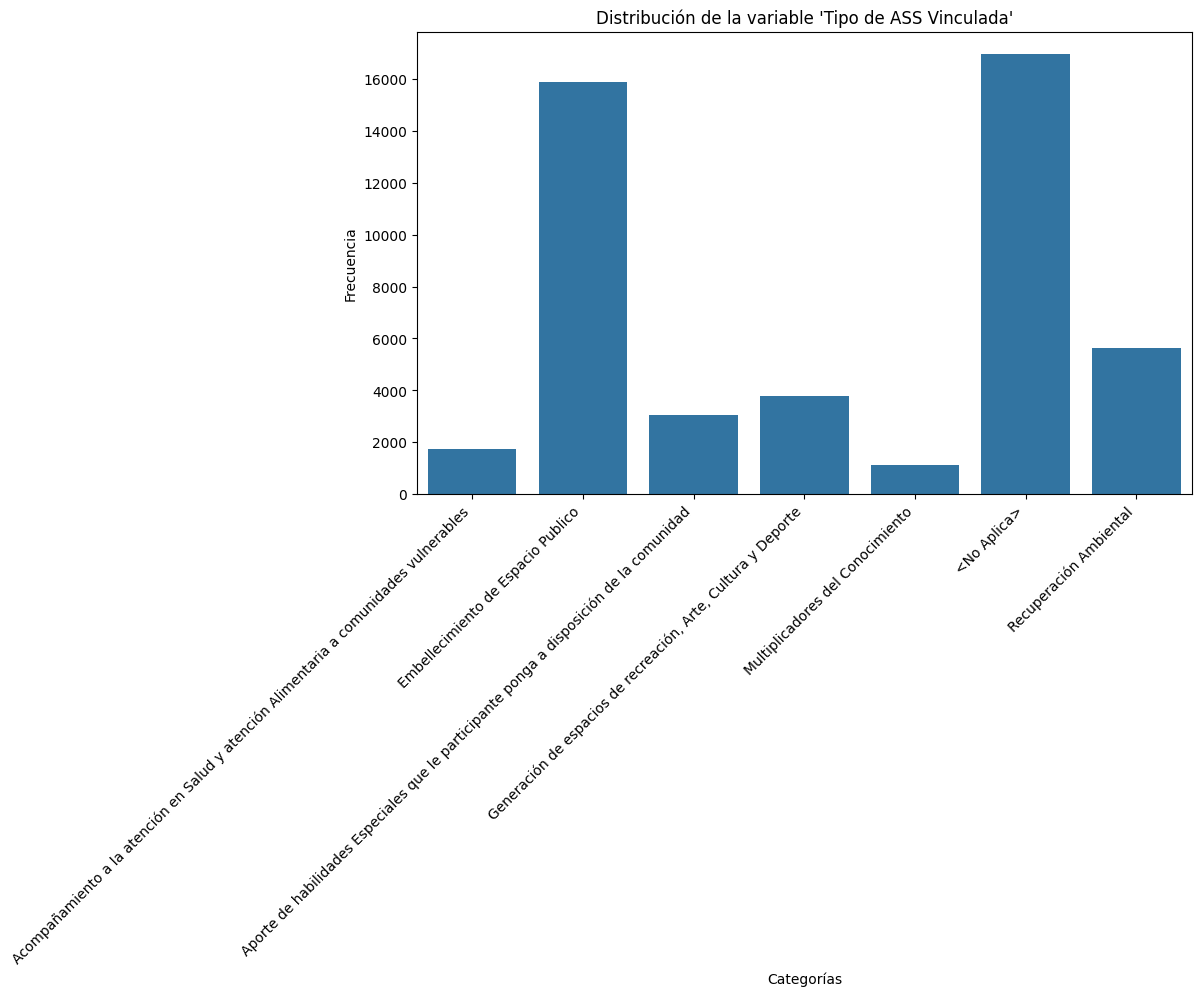

Frecuencia de la variable 'Posee Censo de Familia?':
Posee Censo de Familia?
Sí    30947
No    17216
Name: count, dtype: int64

Porcentaje de la variable 'Posee Censo de Familia?':
Posee Censo de Familia?
Sí    64.254718
No    35.745282
Name: proportion, dtype: float64



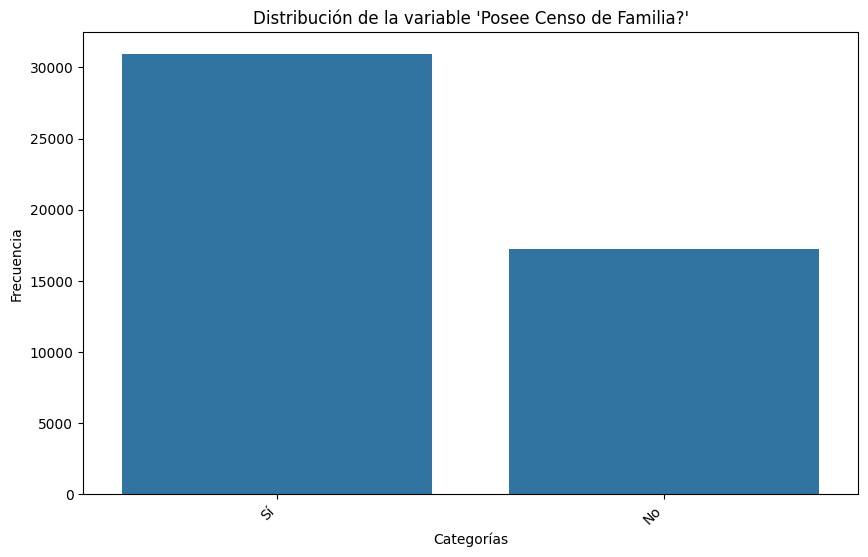

Frecuencia de la variable 'Posee Cónyuge o Compañero(a)?':
Posee Cónyuge o Compañero(a)?
<No Aplica>      17216
Sí               16027
No               14857
<No Registra>       63
Name: count, dtype: int64

Porcentaje de la variable 'Posee Cónyuge o Compañero(a)?':
Posee Cónyuge o Compañero(a)?
<No Aplica>      35.745282
Sí               33.276582
No               30.847331
<No Registra>     0.130806
Name: proportion, dtype: float64



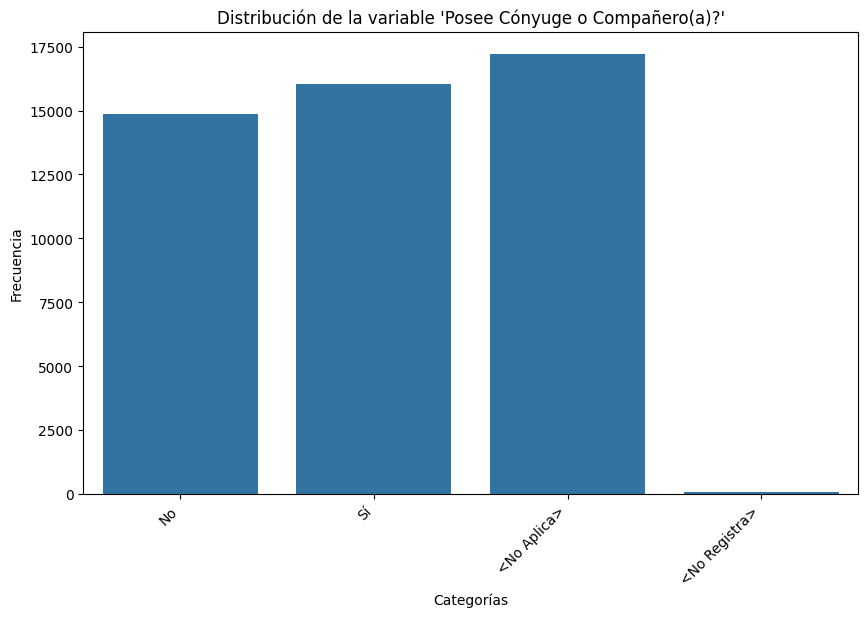

Frecuencia de la variable 'Posee Censo de Habitabilidad?':
Posee Censo de Habitabilidad?
Sí    31473
No    16690
Name: count, dtype: int64

Porcentaje de la variable 'Posee Censo de Habitabilidad?':
Posee Censo de Habitabilidad?
Sí    65.346843
No    34.653157
Name: proportion, dtype: float64



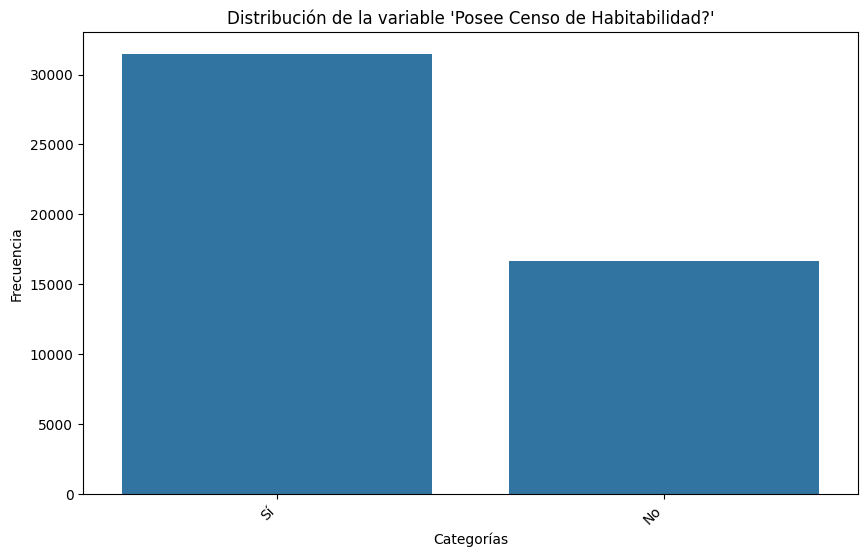

Frecuencia de la variable 'Tipo de Vivienda':
Tipo de Vivienda
Casa                                                                                                      19903
<No Aplica>                                                                                               16690
Apartamento                                                                                                5734
Habitación                                                                                                 1358
Finca                                                                                                      1194
Cuarto(s)                                                                                                  1004
Rancho                                                                                                      926
Casa-Lote                                                                                                   776
Otro tipo de vivienda (carpa, tienda, vag

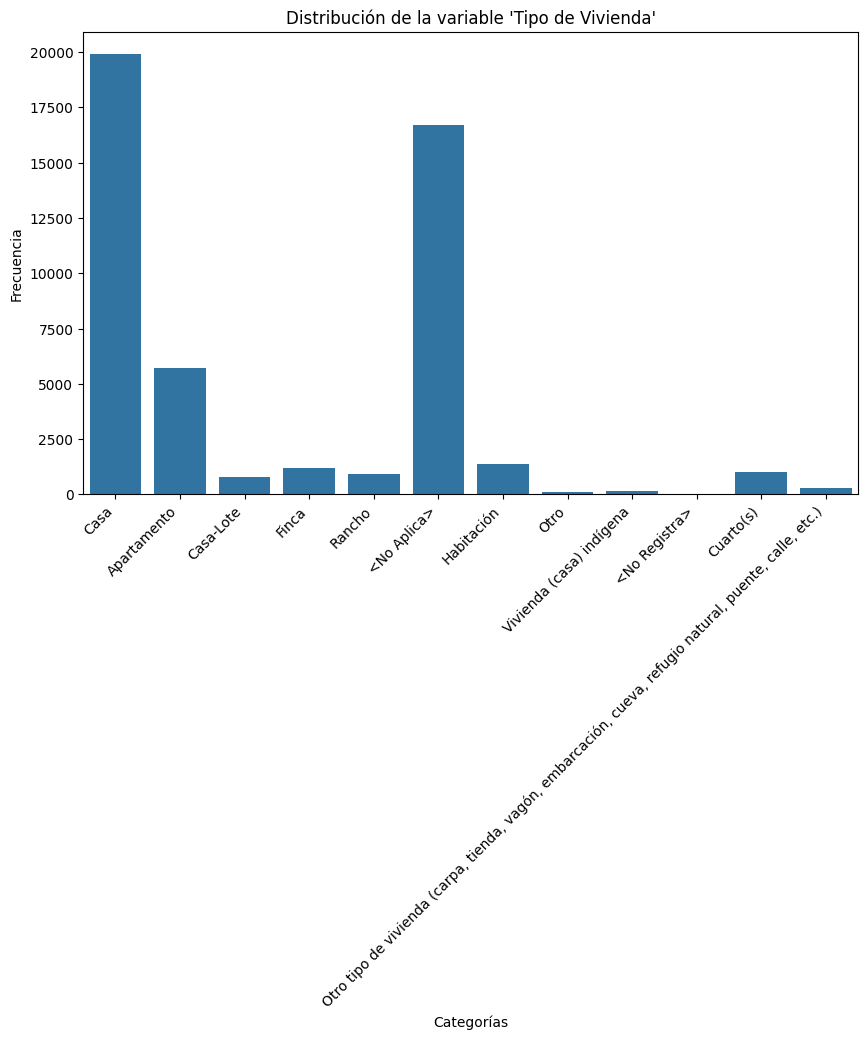

Frecuencia de la variable 'Régimen de tenencia Vivienda':
Régimen de tenencia Vivienda
<No Aplica>                                                                                   16690
En arriendo o subarriendo                                                                     15171
Propia, totalmente pagada                                                                      7029
Con permiso del propietario, sin pago alguno                                                   4094
Otra forma de tenencia  (posesión sin título, ocupante de hecho, propiedad colectiva, etc)     1710
Es usufructo                                                                                   1339
Posesión sin título (ocupante de hecho) o propiedad colectiva                                  1013
Propia, la están pagando                                                                        698
Familiar                                                                                        337
Sana posesión

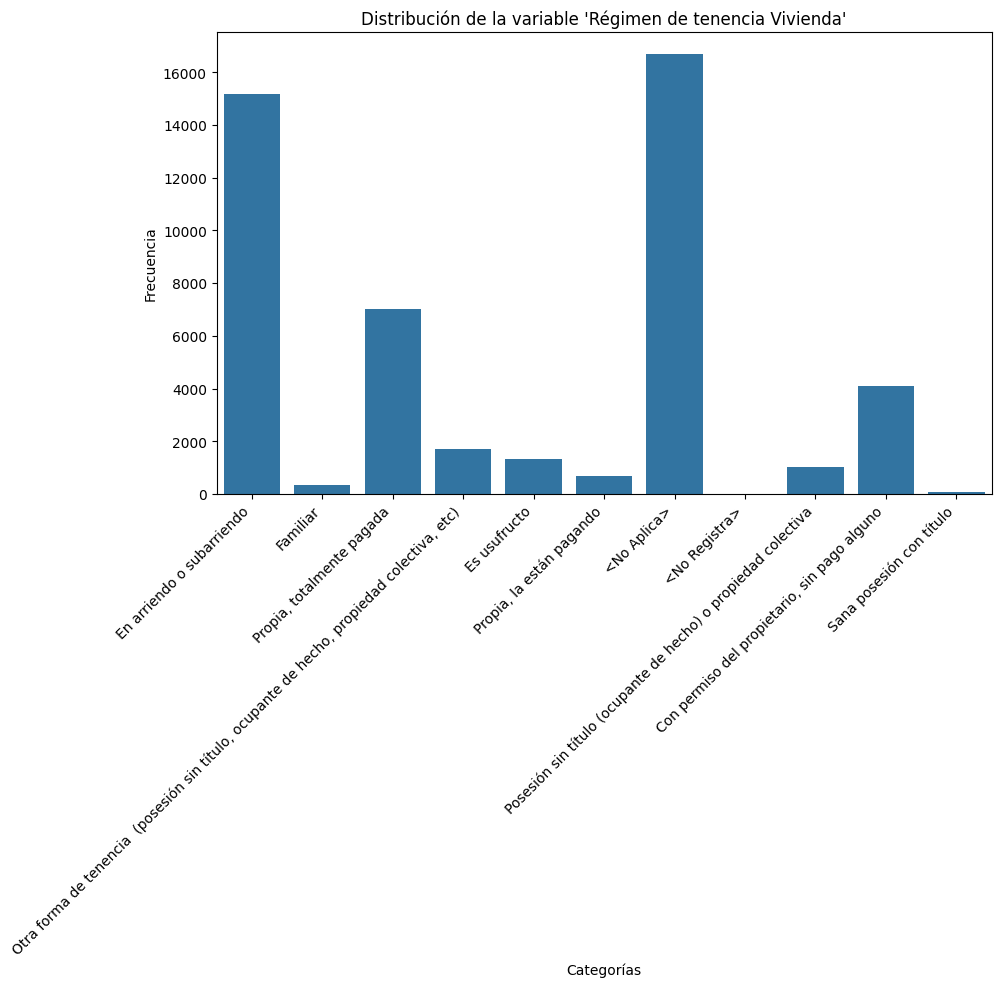

Frecuencia de la variable 'Posee Serv. Públicos Básicos':
Posee Serv. Públicos Básicos
Sí             20711
<No Aplica>    16690
No             10762
Name: count, dtype: int64

Porcentaje de la variable 'Posee Serv. Públicos Básicos':
Posee Serv. Públicos Básicos
Sí             43.001889
<No Aplica>    34.653157
No             22.344954
Name: proportion, dtype: float64



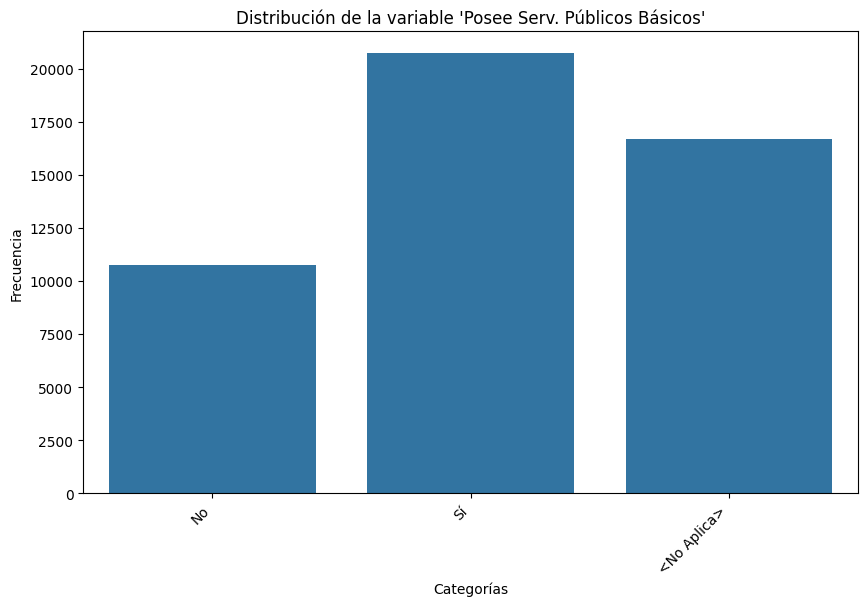

Frecuencia de la variable 'Régimen de salud':
Régimen de salud
S - SUBSIDIADO      24497
C - CONTRIBUTIVO    13388
<No Registra>       10278
Name: count, dtype: int64

Porcentaje de la variable 'Régimen de salud':
Régimen de salud
S - SUBSIDIADO      50.862695
C - CONTRIBUTIVO    27.797272
<No Registra>       21.340033
Name: proportion, dtype: float64



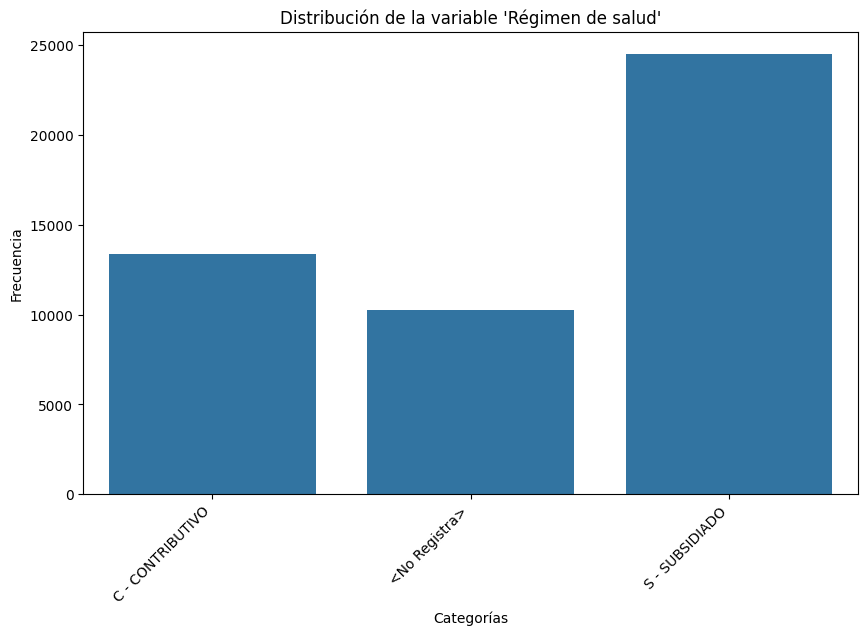

Frecuencia de la variable 'Clasificación Componente Específico':
Clasificación Componente Específico
<No Aplica>                                                            48109
Discapacidad psicosocial o mental asociada a conductas adictivas          23
<No Registra>                                                             13
Discapacidad psicosocial o mental no asociada a conductas adictivas        7
Discapacidad física                                                        5
Enfermedad de alto costo                                                   2
Discapacidad Cognitiva                                                     2
Adulto Mayor                                                               2
Name: count, dtype: int64

Porcentaje de la variable 'Clasificación Componente Específico':
Clasificación Componente Específico
<No Aplica>                                                            99.887881
Discapacidad psicosocial o mental asociada a conductas adictivas        0.

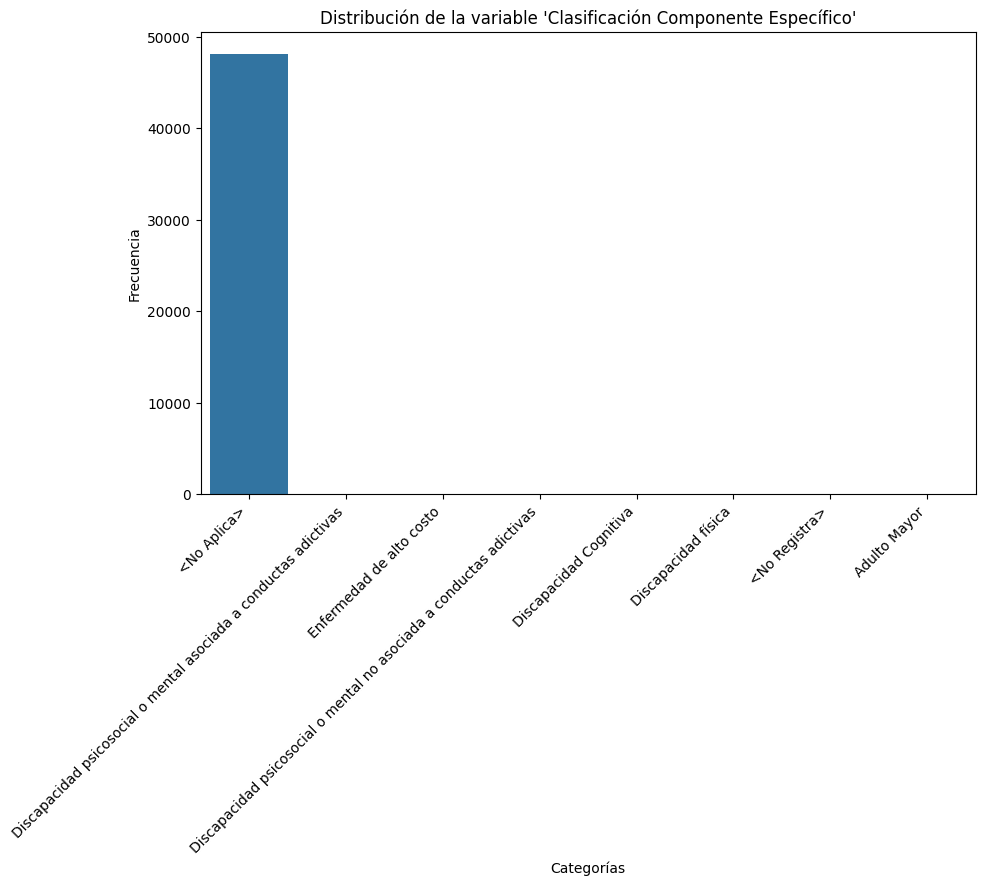

In [ ]:
#Frecuencia y Distribución para todas las variables categoricas
for columna in columnas_categoricas:
    frecuencia = processed_df[columna].value_counts()
    porcentaje = processed_df[columna].value_counts(normalize=True) * 100

    print(f"Frecuencia de la variable '{columna}':\n{frecuencia}\n")
    print(f"Porcentaje de la variable '{columna}':\n{porcentaje}\n")

    plt.figure(figsize=(10, 6))
    sns.countplot(x=columna, data=processed_df)
    plt.title(f"Distribución de la variable '{columna}'")
    plt.xlabel("Categorías")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.show()

##Eliminar primeras columnas

Columnas que no aportan información relevante por su alta cardinalidad, o distribución y frecuencia:



*   Municipio de residencia
*   Departamento de residencia
*   Ingresó/No ingresó (Ya eliminamos aquellos que no ingresaron)
*   Sexo
*   BeneficioTRV*
*   BeneficioFA*
*   BeneficioFPT*
*   BeneficioPDT*
*   Clasificación Componente Específico*
*   FechaCorte
*   FechaActualizacion


(*) para mayor información del significado de estas variables consultar la descripción proporcionada por la ARN en [Datos Abiertos](https://www.datos.gov.co/Inclusi-n-Social-y-Reconciliaci-n/ESTAD-STICAS-DE-LAS-PERSONAS-DESMOVILIZADAS-QUE-HA/39pj-dba6/about_data)



In [ ]:
columnas_a_eliminar = ['Municipio de residencia', 'Departamento de residencia','Ingresó/No ingresó', 'Sexo', 'BeneficioTRV', 'BeneficioFA',
                        'BeneficioFPT', 'BeneficioPDT', 'Clasificación Componente Específico', 'FechaCorte', 'FechaActualizacion']

processed_df = processed_df.drop(columns=columnas_a_eliminar)
processed_df.head()

Tipo de Desmovilización Ex Grupo  Año desmovilización  \
0              Individual     FARC                 2010   
1               Colectiva      AUC                 2003   
2               Colectiva      AUC                 2006   
3               Colectiva      AUC                 2006   
4               Colectiva      AUC                 2005   

   Año de Independización/Ingreso        Grupo Etario  \
0                            2010  Entre 26 y 40 años   
1                            2003  Entre 41 y 60 años   
2                            2006  Entre 41 y 60 años   
3                            2006  Entre 41 y 60 años   
4                            2005  Entre 41 y 60 años   

  Situación Final frente al proceso    Nivel Educativo  \
0                         Culminado          Bachiller   
1                         Culminado          Bachiller   
2                         Culminado          Bachiller   
3                         Culminado    Básica Primaria   
4                         Culminado  Básica Secundaria   

  Máximo Nivel FpT Reportado Línea de FpT para el Máx. Nivel  \
0                    Técnico                           SALUD   
1                <No Aplica>                     <No Aplica>   
2             Semicalificado  MECANICA AUTOMOTRIZ Y DE MOTOS   
3             Complementario                           OTROS   
4             Complementario                    AGROPECUARIA   

               OcupacionEconomica Desembolso BIE Tipo de BIE Accedido  \
0  Ocupados en el sector Informal             Sí      Plan de Negocio   
1  Ocupados en el sector Informal             Sí      Plan de Negocio   
2  Ocupados en el sector Informal             Sí      Plan de Negocio   
3  Ocupados en el sector Informal             Sí      Plan de Negocio   
4  Ocupados en el sector Informal             Sí      Plan de Negocio   

  DesagregadoDesembolsoBIE        Estado ISUN  \
0     Posee desembolso BIE            Cerrado   
1     Posee desembolso BIE  En Funcionamiento   
2     Posee desembolso BIE            Cerrado   
3     Posee desembolso BIE  En Funcionamiento   
4     Posee desembolso BIE            Cerrado   

                   Posee Servicio Social? Estado de la vinculación ASS  \
0  Posee Certificación de Servicio Social                  Certificado   
1  Posee Certificación de Servicio Social                  Certificado   
2  Posee Certificación de Servicio Social                  Certificado   
3  Posee Certificación de Servicio Social                  Certificado   
4  Posee Certificación de Servicio Social                  Certificado   

                               Tipo de ASS Vinculada Posee Censo de Familia?  \
0  Acompañamiento a la atención en Salud y atenci...                      Sí   
1                 Embellecimiento de Espacio Publico                      Sí   
2  Aporte de habilidades Especiales que le partic...                      Sí   
3                 Embellecimiento de Espacio Publico                      Sí   
4  Generación de espacios de recreación, Arte, Cu...                      Sí   

  Posee Cónyuge o Compañero(a)?  N° de Hijos  \
0                            No            0   
1                            No            4   
2                            No            0   
3                            Sí            3   
4                            No            1   

   Total Integrantes grupo familiar Posee Censo de Habitabilidad?  \
0                                 1                            Sí   
1                                 5                            Sí   
2                                 1                            Sí   
3                                 6                            Sí   
4                                 2                            Sí   

  Tipo de Vivienda Régimen de tenencia Vivienda Posee Serv. Públicos Básicos  \
0             Casa    En arriendo o subarriendo                           No   
1      Apartamento    En arriendo o subarriend

##Analizar Correlaciones en variables Categoricas

###Tablas de Contingencia

El método utilizado para establecer los niveles de correlación entre las variables categoricas con nuestra variable objetivo (Situación final frente al proceso) son las tablas de contigencia, gracias a las cuales podremos extraer los indicadores estadísticos Cramer's V y la Prueba de Chi-cuadrado




---

*el texto a continuación fue generado por Gemini*
####Prueba de Chi-cuadrado:
Interpretación:

* Estadístico Chi-cuadrado: Un valor alto del estadístico indica una mayor diferencia y, por lo tanto, una mayor evidencia de una asociación.
* Valor p: Si el valor p es menor que un nivel de significancia predefinido (generalmente 0.05), se rechaza la hipótesis nula de que no hay relación entre las variables, y se concluye que existe una asociación significativa.

##Cramer's V:
Interpretación:

* Valores cercanos a 0: Indican una asociación débil o nula.
* Valores cercanos a 1: Indican una asociación fuerte

In [ ]:
#Incluir 'Año de Independización/Ingreso', 'Año de desmovilización', 'N° de Hijos', 'Total Integrantes grupo familiar' como variables categoricas
processed_df['Año de Independización/Ingreso'] = processed_df['Año de Independización/Ingreso'].astype('object')
processed_df['Año desmovilización'] = processed_df['Año desmovilización'].astype('object')
processed_df['N° de Hijos'] = processed_df['N° de Hijos'].astype('object')
processed_df['Total Integrantes grupo familiar'] = processed_df['Total Integrantes grupo familiar'].astype('object')

In [ ]:
# Obtener nuevamente las columnas categóricas
columnas_categoricas = processed_df.select_dtypes(include=['object', 'category']).columns

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Tipo de Desmovilización':
Tipo de Desmovilización            Colectiva  Individual
Situación Final frente al proceso                       
Culminado                              16310       11935
Fuera del Proceso                      10473        9445


Estadístico Chi-cuadrado: 125.98298303445233
Valor p: 3.1013127740617294e-29
Cramer's V: 0.051144528401634345

--------------------



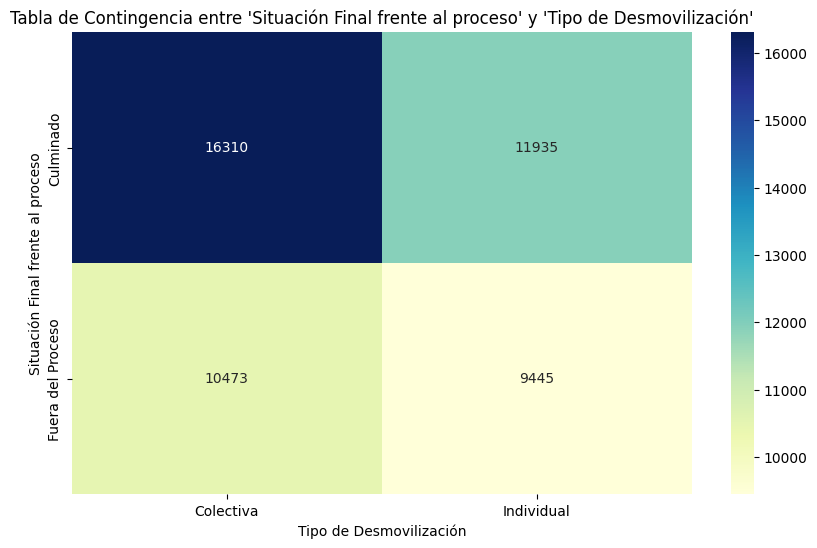

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Ex Grupo':
Ex Grupo                             AUC   ELN  EPL  ERG  ERP  FARC  SIN DATO  \
Situación Final frente al proceso                                               
Culminado                          17351  1647   46   76  105  9016         3   
Fuera del Proceso                  11570  1545   36   50   47  6654        10   

Ex Grupo                           SIN DATO MINDEFENSA  
Situación Final frente al proceso                       
Culminado                                            1  
Fuera del Proceso                                    6  


Estadístico Chi-cuadrado: 114.66542815800494
Valor p: 9.866508437812844e-22
Cramer's V: 0.048793220431844433

--------------------



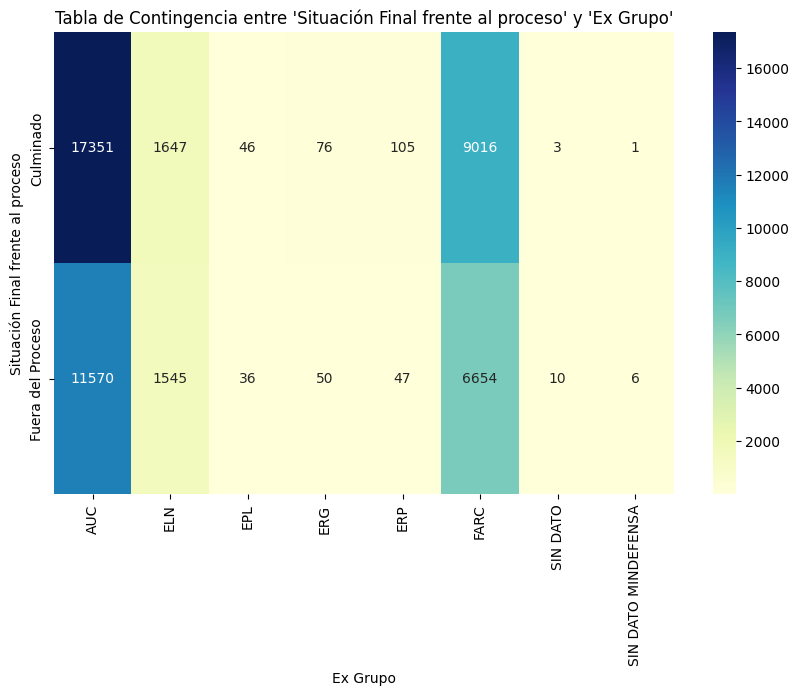

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Año desmovilización':
Año desmovilización                2002  2003  2004  2005   2006  2007  2008  \
Situación Final frente al proceso                                              
Culminado                             0   964  1975  5936  10831  1385  1647   
Fuera del Proceso                     2  1110  1556  4574   6582  1205  1093   

Año desmovilización                2009  2010  2011  2012  2013  2014  2015  \
Situación Final frente al proceso                                             
Culminado                          1345  1179   703   502   580   522   335   
Fuera del Proceso                  1045   691   435   317   356   277   190   

Año desmovilización                2016  2017  2018  2019  2020  2021  2022  \
Situación Final frente al proceso                                             
Culminado                           219    80    28    11     3     0     0   
Fuera del Proceso                   

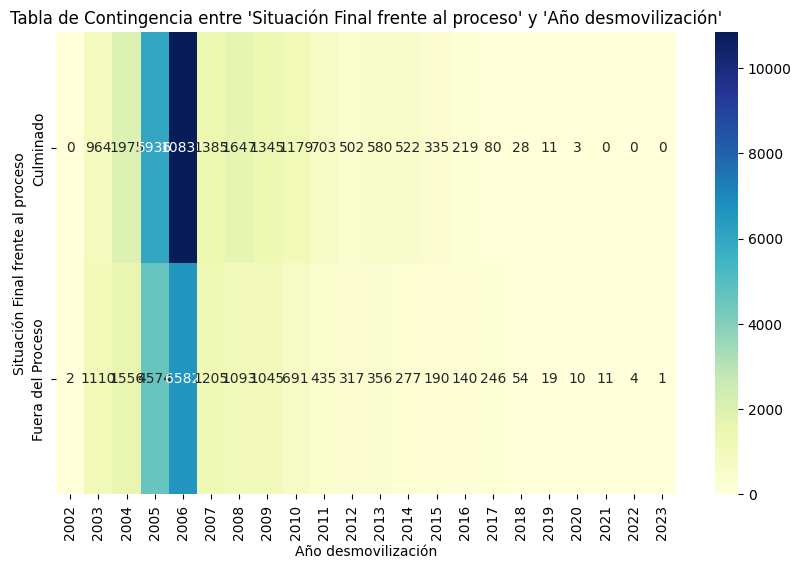

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Año de Independización/Ingreso':
Año de Independización/Ingreso     2003  2004  2005   2006  2007  2008  2009  \
Situación Final frente al proceso                                              
Culminado                           323  1076  5681  10065  2079  1624  1446   
Fuera del Proceso                   372   792  4370   6004  2181  1238  1128   

Año de Independización/Ingreso     2010  2011  2012  2013  2014  2015  2016  \
Situación Final frente al proceso                                             
Culminado                          1354  1367   647   622   614   512   476   
Fuera del Proceso                   828   932   460   392   314   251   183   

Año de Independización/Ingreso     2017  2018  2019  2020  2021  2022  2023  
Situación Final frente al proceso                                            
Culminado                           221   102    29     7     0     0     0  
Fuera del Proceso           

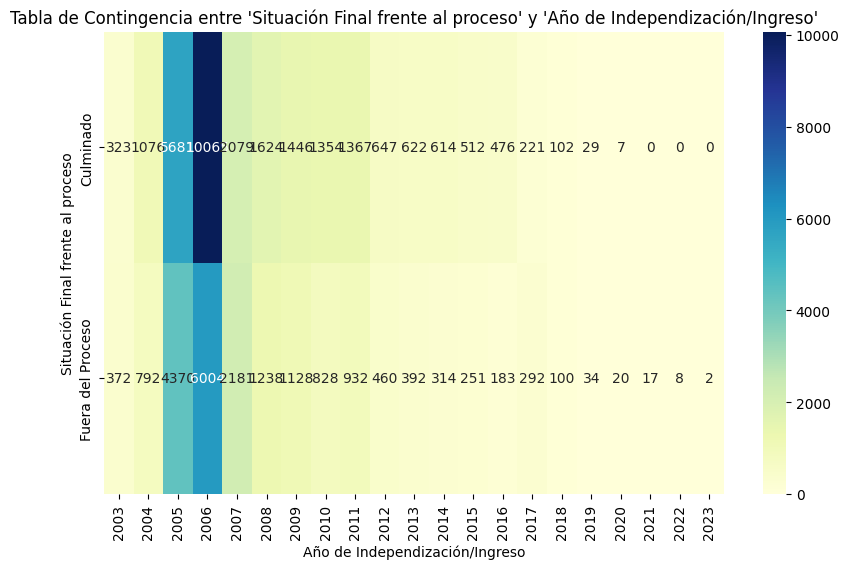

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Grupo Etario':
Grupo Etario                       <No Registra>  Entre 18 y 25 años  \
Situación Final frente al proceso                                      
Culminado                                      0                  38   
Fuera del Proceso                             45                  89   

Grupo Etario                       Entre 26 y 40 años  Entre 41 y 60 años  \
Situación Final frente al proceso                                           
Culminado                                        8856               17897   
Fuera del Proceso                                7790               11443   

Grupo Etario                       Mayor de 60 años  
Situación Final frente al proceso                    
Culminado                                      1454  
Fuera del Proceso                               551  


Estadístico Chi-cuadrado: 536.5029582464587
Valor p: 8.511791015958057e-115
Cramer's V: 0.105542966118

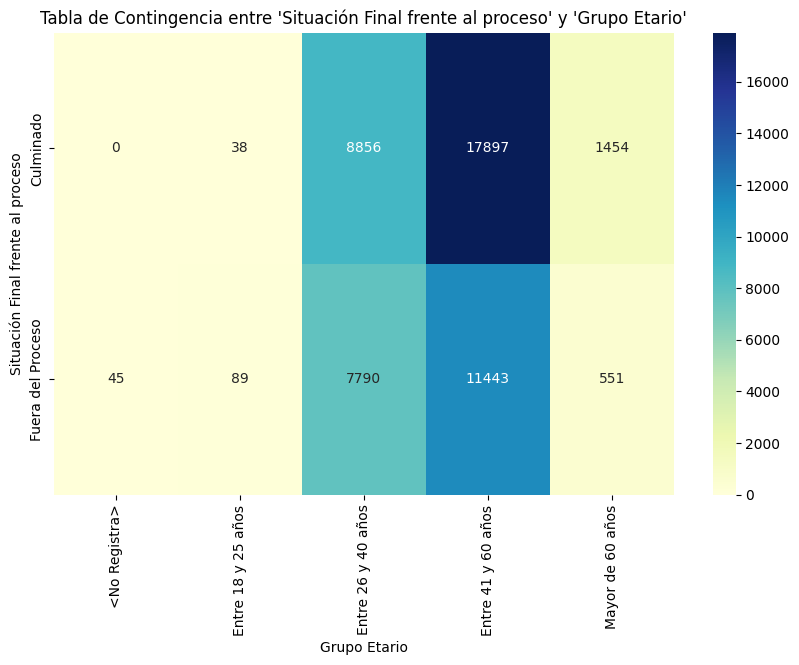

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Situación Final frente al proceso':
Situación Final frente al proceso  Culminado  Fuera del Proceso
Situación Final frente al proceso                              
Culminado                              28245                  0
Fuera del Proceso                          0              19918


Estadístico Chi-cuadrado: 48158.87683742685
Valor p: 0.0
Cramer's V: 0.9999571948298344

--------------------



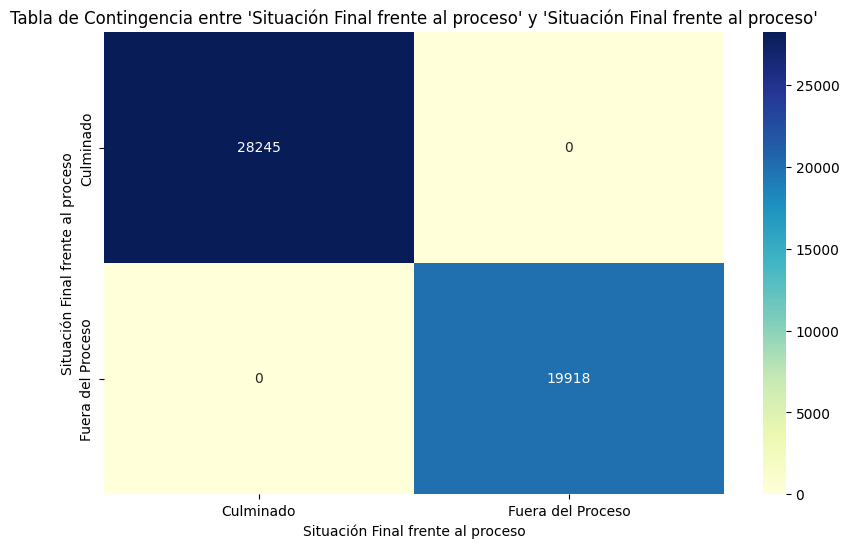

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Nivel Educativo':
Nivel Educativo                    Alfabetización  Bachiller  Básica Primaria  \
Situación Final frente al proceso                                               
Culminado                                     859      14092             8077   
Fuera del Proceso                            2722       2213             5454   

Nivel Educativo                    Básica Secundaria  Por Establecer  
Situación Final frente al proceso                                     
Culminado                                       4784             433  
Fuera del Proceso                               2746            6783  


Estadístico Chi-cuadrado: 15288.986068391641
Valor p: 0.0
Cramer's V: 0.5634204123576125

--------------------



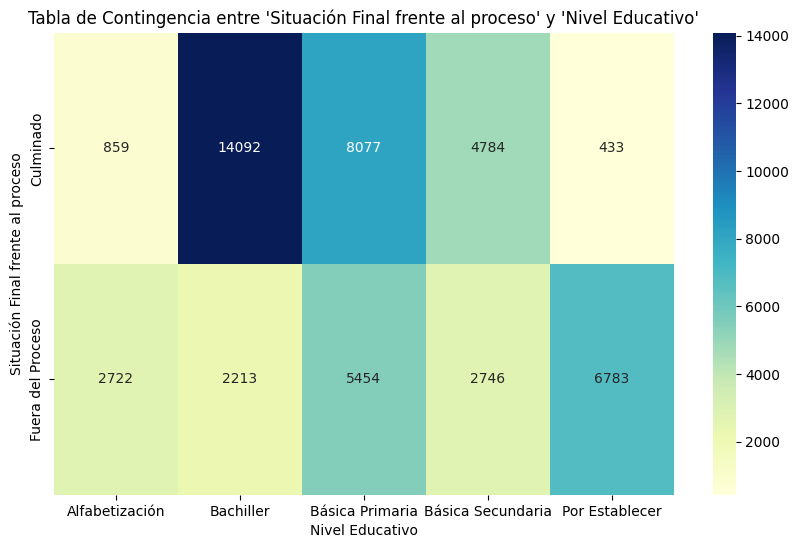

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Máximo Nivel FpT Reportado':
Máximo Nivel FpT Reportado         <No Aplica>  Auxiliar  \
Situación Final frente al proceso                          
Culminado                                 7902       150   
Fuera del Proceso                        13209        32   

Máximo Nivel FpT Reportado         Certificación por Evaluación de Competencias  \
Situación Final frente al proceso                                                 
Culminado                                                                     2   
Fuera del Proceso                                                             0   

Máximo Nivel FpT Reportado         Complementario  \
Situación Final frente al proceso                   
Culminado                                    6027   
Fuera del Proceso                            1793   

Máximo Nivel FpT Reportado         Especialización Tecnológica  \
Situación Final frente al proceso                  

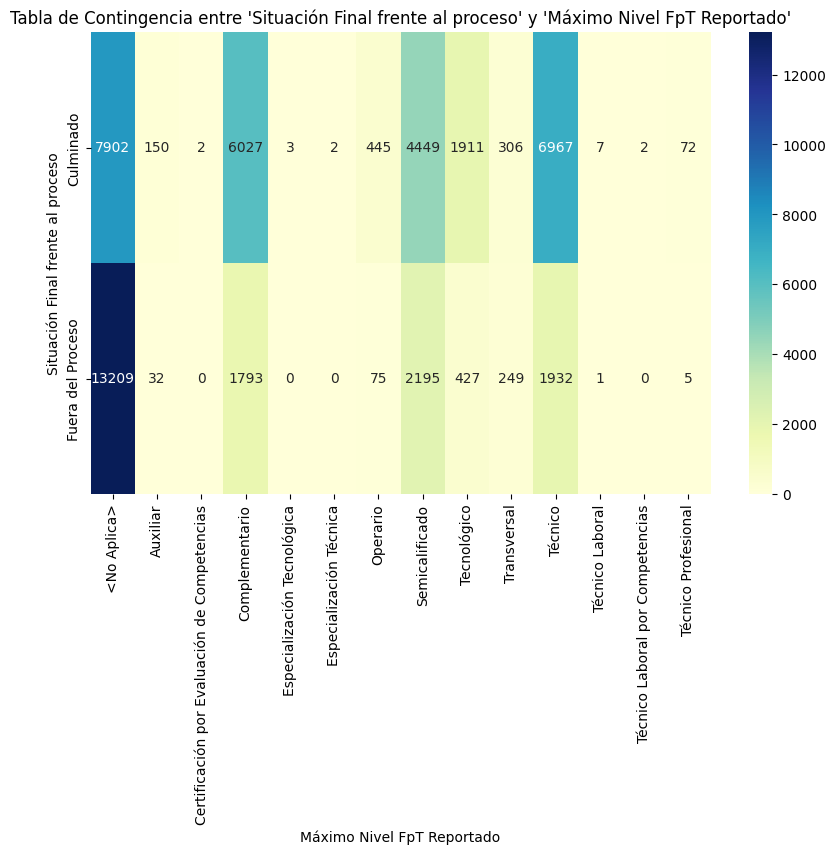

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Línea de FpT para el Máx. Nivel':
Línea de FpT para el Máx. Nivel    <No Aplica>  <No Registra>  AGROPECUARIA  \
Situación Final frente al proceso                                             
Culminado                                 7902           1753          3298   
Fuera del Proceso                        13209            975          1046   

Línea de FpT para el Máx. Nivel    ALIMENTOS Y BEBIDAS  AMBIENTAL  \
Situación Final frente al proceso                                   
Culminado                                         1306        315   
Fuera del Proceso                                  536         54   

Línea de FpT para el Máx. Nivel    ARTESANIAS Y JOYERIA  \
Situación Final frente al proceso                         
Culminado                                           125   
Fuera del Proceso                                    29   

Línea de FpT para el Máx. Nivel    CARPINTERIA Y EBANISTERIA  \
Situ

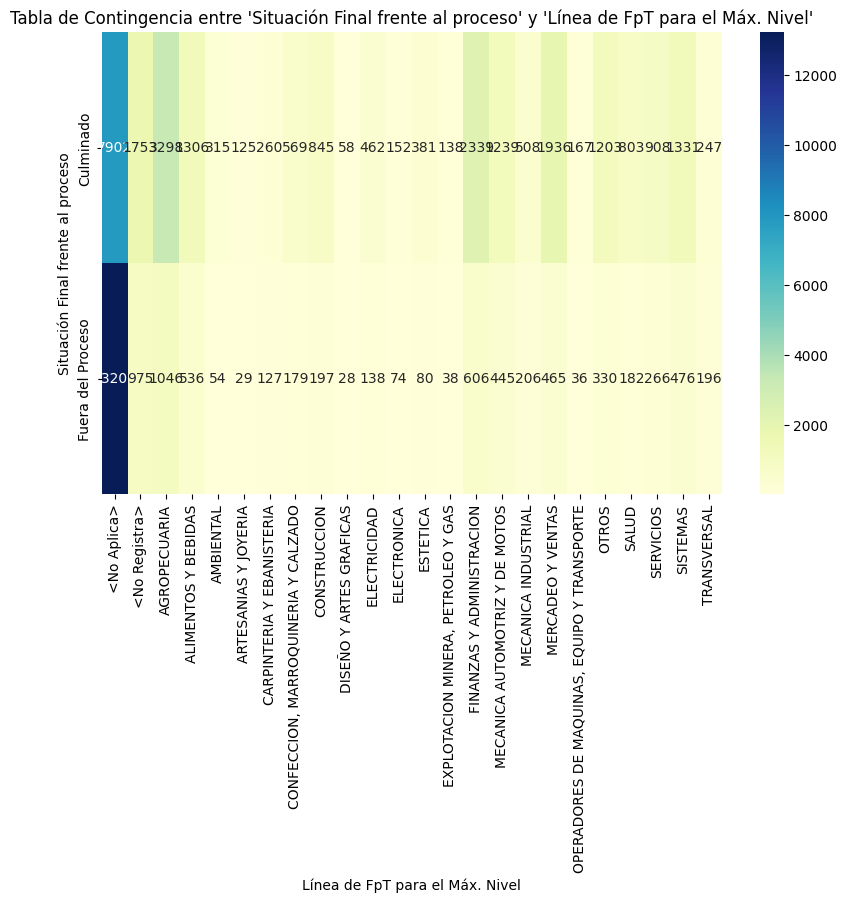

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'OcupacionEconomica':
OcupacionEconomica                 <No Registra>  Desocupados  No Aplica  \
Situación Final frente al proceso                                          
Culminado                                   1546         1920          0   
Fuera del Proceso                           8533         1002       5229   

OcupacionEconomica                 Ocupados en el sector Informal  \
Situación Final frente al proceso                                   
Culminado                                                   21829   
Fuera del Proceso                                            3776   

OcupacionEconomica                 Población Económicamente Inactiva  
Situación Final frente al proceso                                     
Culminado                                                       2950  
Fuera del Proceso                                               1378  


Estadístico Chi-cuadrado: 22905.347101425516

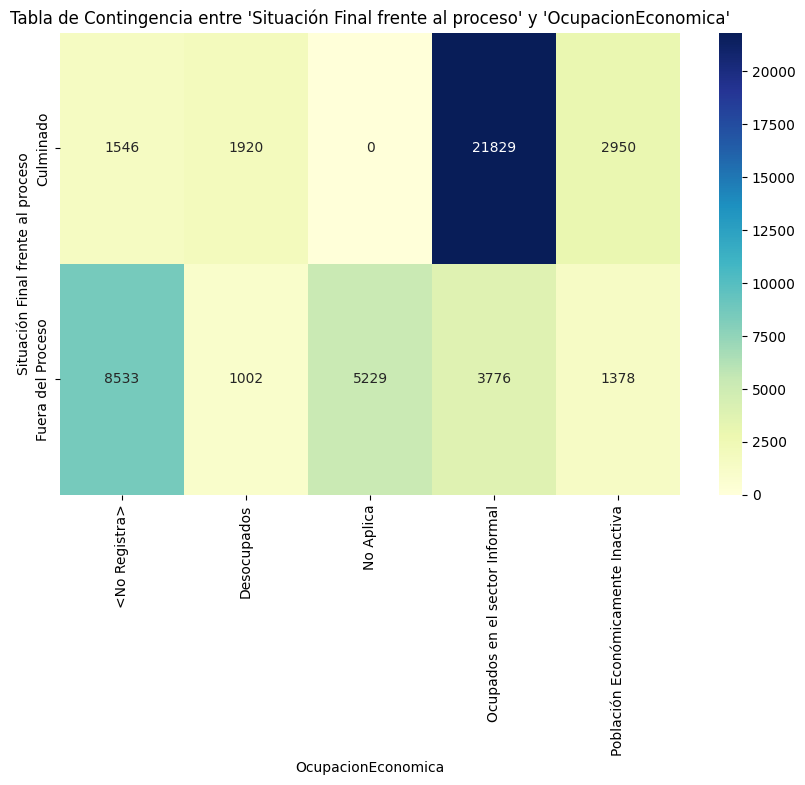

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Desembolso BIE':
Desembolso BIE                        No     Sí
Situación Final frente al proceso              
Culminado                           5468  22777
Fuera del Proceso                  16528   3390


Estadístico Chi-cuadrado: 19052.25048102808
Valor p: 0.0
Cramer's V: 0.6289503685829002

--------------------



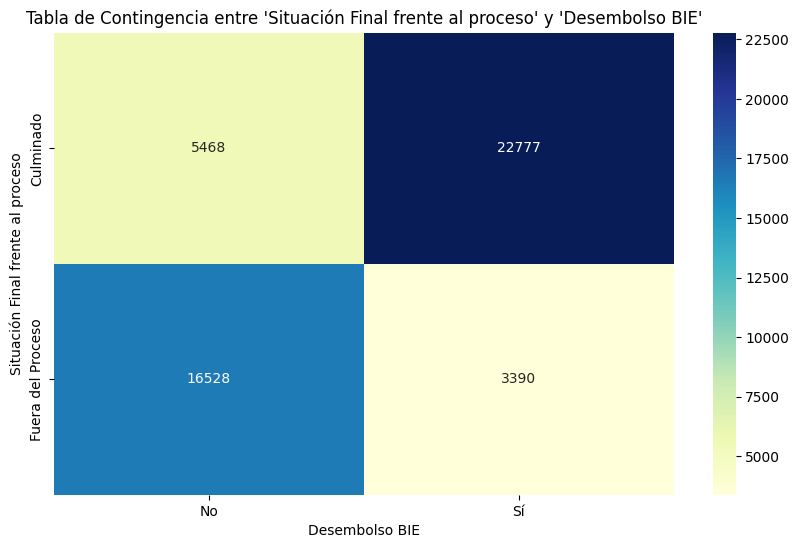

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Tipo de BIE Accedido':
Tipo de BIE Accedido               <No Aplica>  Educación Superior  \
Situación Final frente al proceso                                    
Culminado                                 5468                  37   
Fuera del Proceso                        16528                   1   

Tipo de BIE Accedido               Plan de Negocio  Vivienda  
Situación Final frente al proceso                             
Culminado                                    22259       481  
Fuera del Proceso                             3156       233  


Estadístico Chi-cuadrado: 19173.50702629568
Valor p: 0.0
Cramer's V: 0.6309486466582868

--------------------



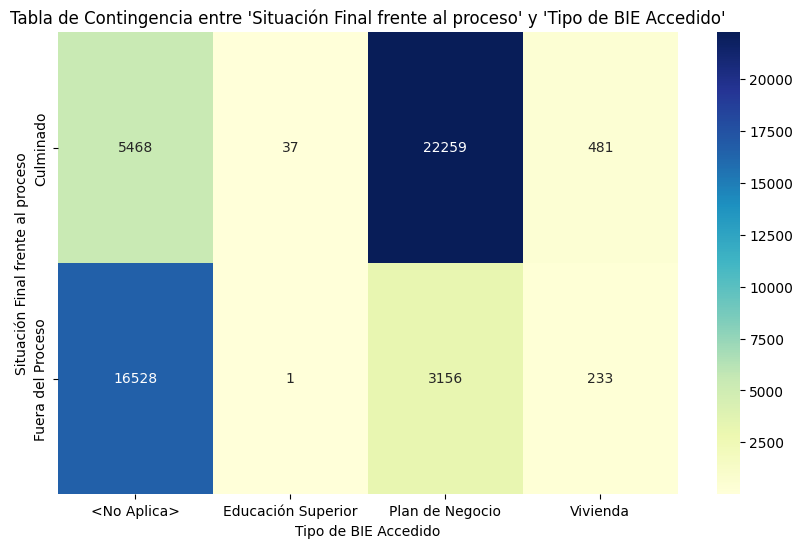

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'DesagregadoDesembolsoBIE':
DesagregadoDesembolsoBIE           Culminado con agotamiento de tiempo para acceder a BIE  \
Situación Final frente al proceso                                                           
Culminado                                                                       5367        
Fuera del Proceso                                                                  0        

DesagregadoDesembolsoBIE           Culminado sin agotamiento de tiempo para acceder a BIE  \
Situación Final frente al proceso                                                           
Culminado                                                                        101        
Fuera del Proceso                                                                  0        

DesagregadoDesembolsoBIE           No está en Proceso  Posee desembolso BIE  
Situación Final frente al proceso                                            
Culm

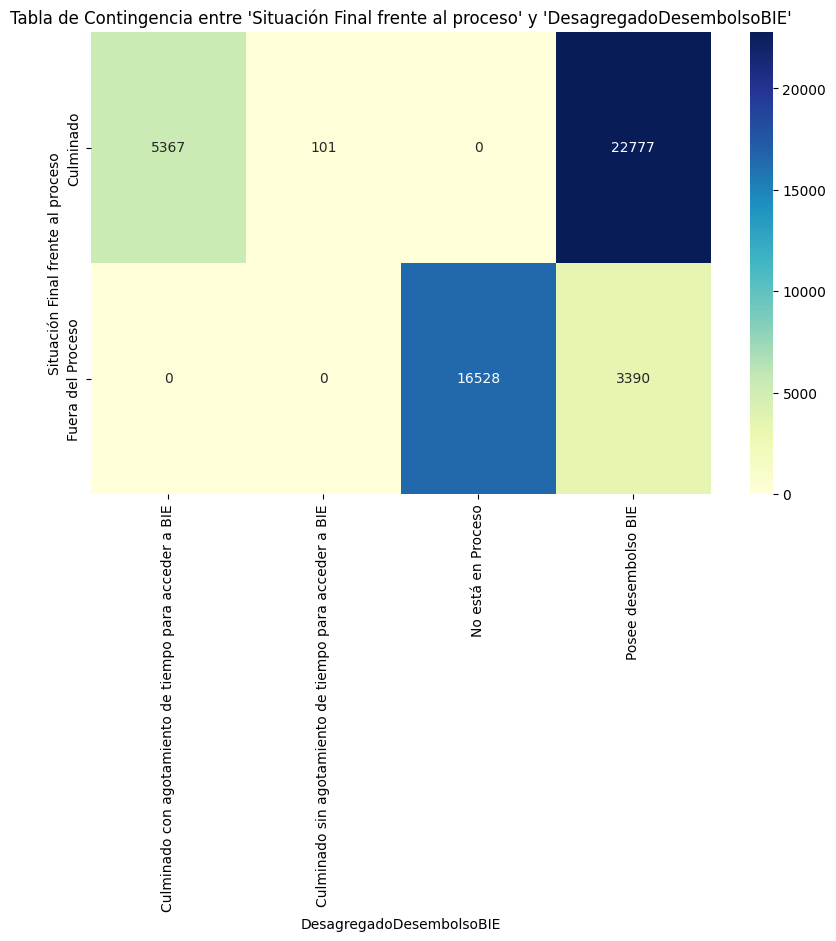

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Estado ISUN':
Estado ISUN                        <No Aplica>  Cerrado  En Funcionamiento  \
Situación Final frente al proceso                                            
Culminado                                 5469     8582              10524   
Fuera del Proceso                        16528      883                142   

Estado ISUN                        Pendiente por visita ISUN  
Situación Final frente al proceso                             
Culminado                                               3670  
Fuera del Proceso                                       2365  


Estadístico Chi-cuadrado: 21410.49703565064
Valor p: 0.0
Cramer's V: 0.6667401514650374

--------------------



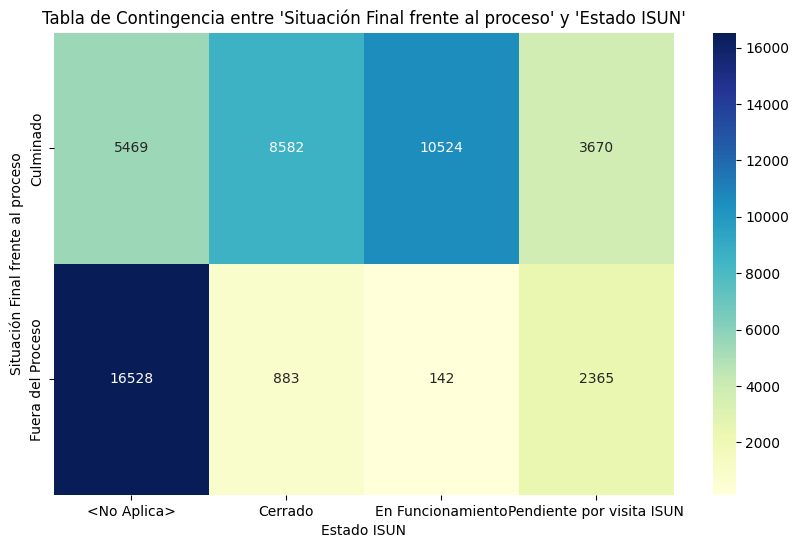

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Posee Servicio Social?':
Posee Servicio Social?             No está vinculado a Servicio Social  \
Situación Final frente al proceso                                        
Culminado                                                          528   
Fuera del Proceso                                                16907   

Posee Servicio Social?             Posee Certificación de Servicio Social  \
Situación Final frente al proceso                                           
Culminado                                                           27692   
Fuera del Proceso                                                    2755   

Posee Servicio Social?             Se encuentra vinculado a Servicio Social  
Situación Final frente al proceso                                            
Culminado                                                                25  
Fuera del Proceso                                                   

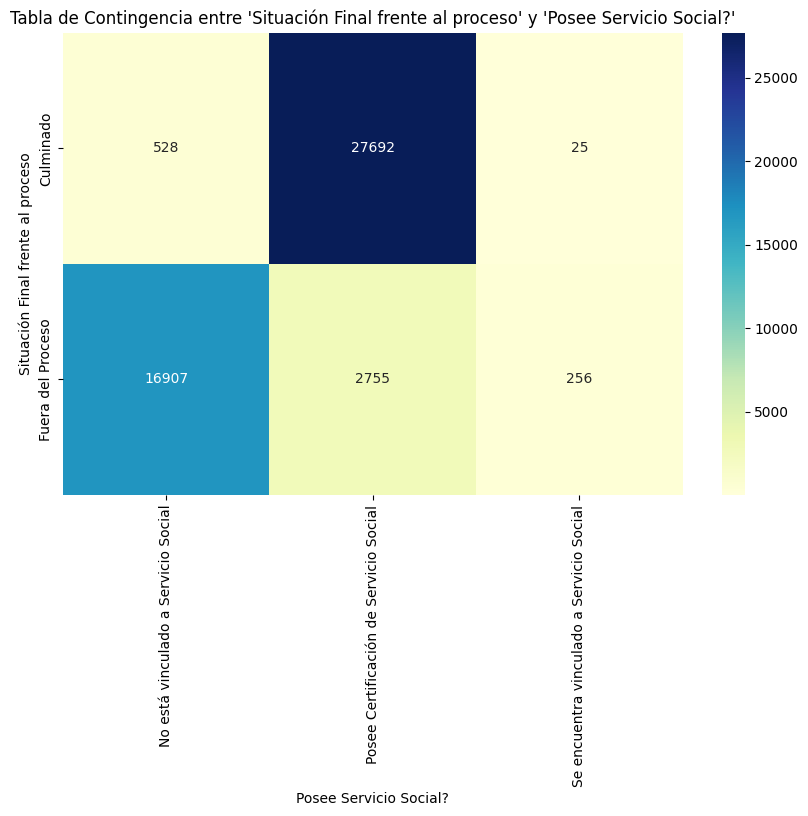

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Estado de la vinculación ASS':
Estado de la vinculación ASS       <No Aplica>  Abandono con justa causa  \
Situación Final frente al proceso                                          
Culminado                                  468                        25   
Fuera del Proceso                        16501                       172   

Estado de la vinculación ASS       Abandono sin justa causa  Certificado  \
Situación Final frente al proceso                                          
Culminado                                                11        27692   
Fuera del Proceso                                       227         2755   

Estado de la vinculación ASS       No vinculado por limitaciones físicas o mentales permanentes certificadas  \
Situación Final frente al proceso                                                                              
Culminado                                                           

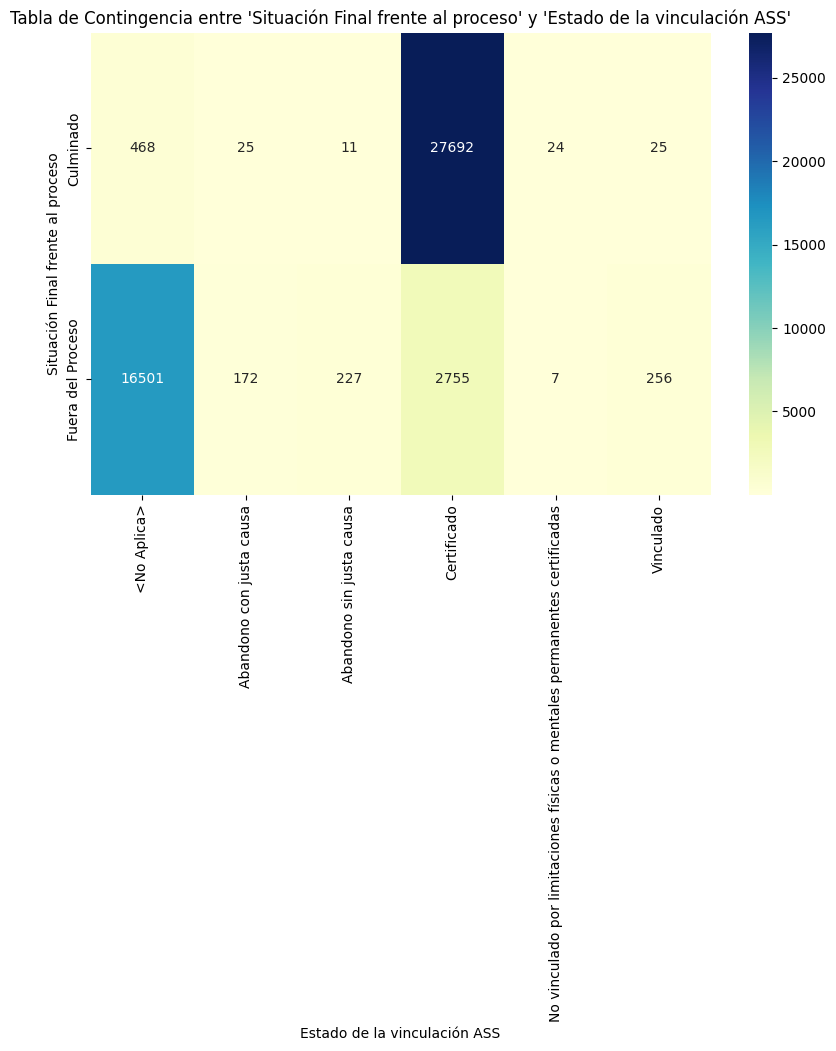

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Tipo de ASS Vinculada':
Tipo de ASS Vinculada              <No Aplica>  \
Situación Final frente al proceso                
Culminado                                  468   
Fuera del Proceso                        16501   

Tipo de ASS Vinculada              Acompañamiento a la atención en Salud y atención Alimentaria a comunidades vulnerables  \
Situación Final frente al proceso                                                                                           
Culminado                                                                       1555                                        
Fuera del Proceso                                                                163                                        

Tipo de ASS Vinculada              Aporte de habilidades Especiales que le participante ponga a disposición de la comunidad  \
Situación Final frente al proceso                                               

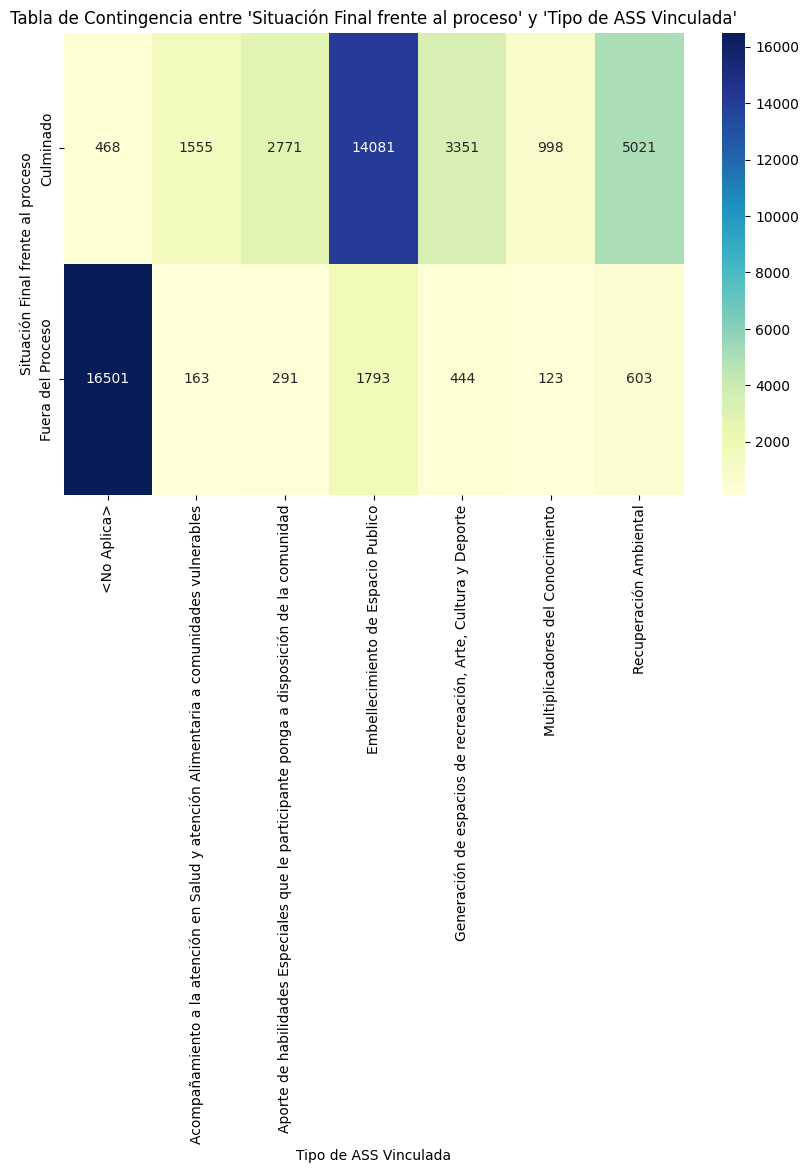

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Posee Censo de Familia?':
Posee Censo de Familia?               No     Sí
Situación Final frente al proceso              
Culminado                           3012  25233
Fuera del Proceso                  14204   5714


Estadístico Chi-cuadrado: 18703.78561553672
Valor p: 0.0
Cramer's V: 0.6231720875400711

--------------------



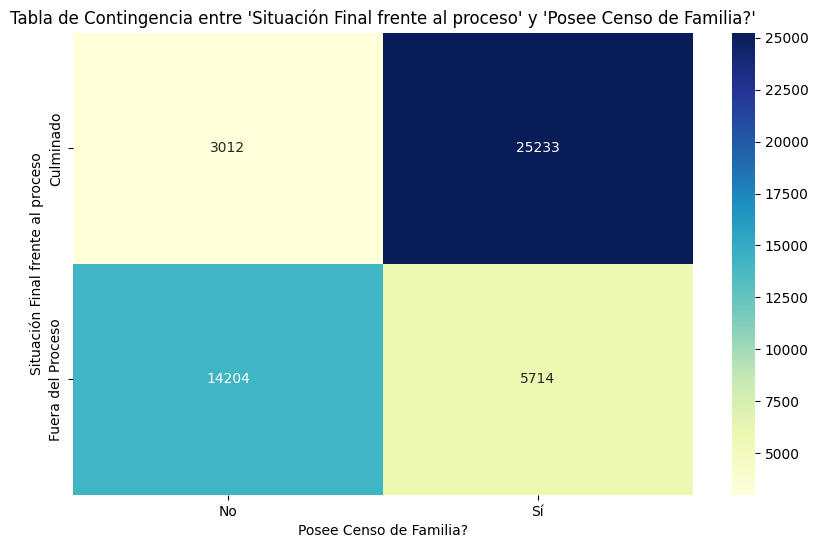

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Posee Cónyuge o Compañero(a)?':
Posee Cónyuge o Compañero(a)?      <No Aplica>  <No Registra>     No     Sí
Situación Final frente al proceso                                          
Culminado                                 3012             49  11324  13860
Fuera del Proceso                        14204             14   3533   2167


Estadístico Chi-cuadrado: 19041.380212863845
Valor p: 0.0
Cramer's V: 0.628770919056801

--------------------



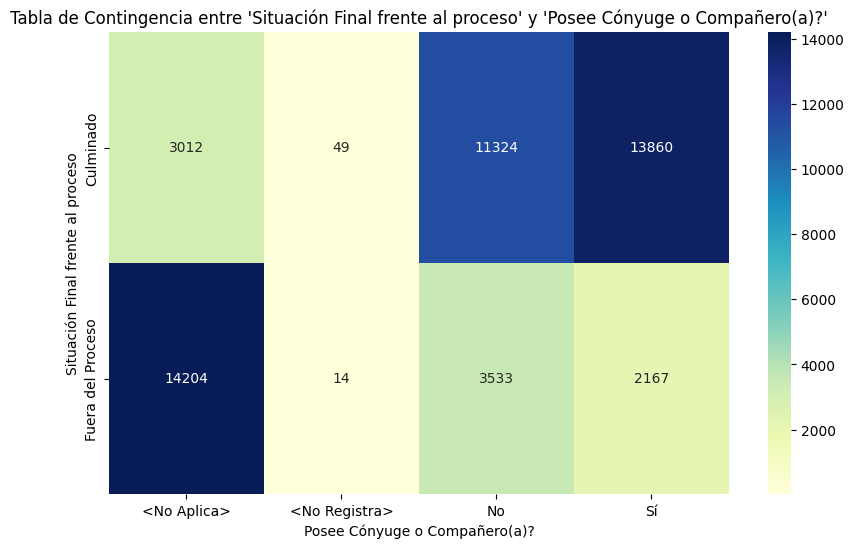

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'N° de Hijos':
N° de Hijos                          -2   -1      0     1     2     3    4   \
Situación Final frente al proceso                                             
Culminado                           3012   49  10728  5610  5018  2474  908   
Fuera del Proceso                  14204   14   3725   840   660   296  122   

N° de Hijos                         5    6    7    8    9    10   11  
Situación Final frente al proceso                                     
Culminado                          301  102   31    6    3    1    2  
Fuera del Proceso                   35   13    3    4    1    0    1  


Estadístico Chi-cuadrado: 19316.240177445554
Valor p: 0.0
Cramer's V: 0.6332927745800926

--------------------



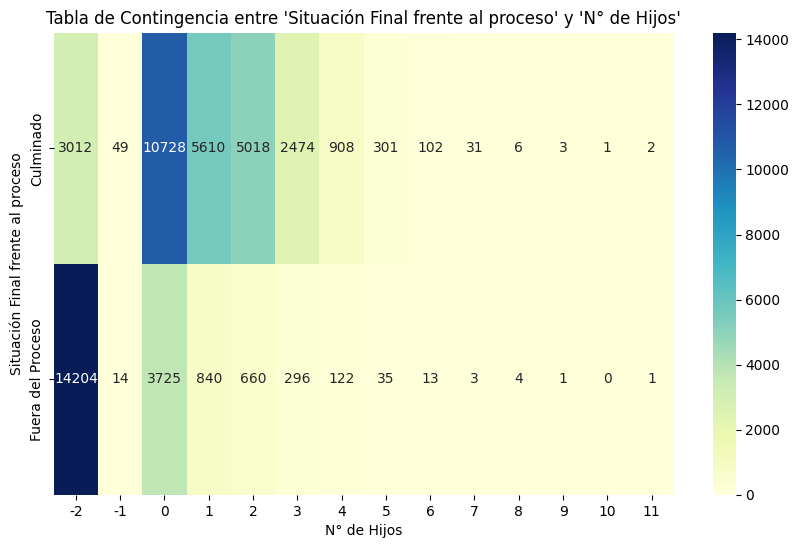

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Total Integrantes grupo familiar':
Total Integrantes grupo familiar     -1     1     2     3     4     5     6   \
Situación Final frente al proceso                                              
Culminado                           3016  6151  4719  5397  4847  2480  1030   
Fuera del Proceso                  14205  2535  1117   846   660   321   145   

Total Integrantes grupo familiar    7    8    9    10   11   12   13   14  \
Situación Final frente al proceso                                           
Culminado                          388  137   44   19    9    3    2    0   
Fuera del Proceso                   50   20    8    8    0    1    0    1   

Total Integrantes grupo familiar    15   16   28  
Situación Final frente al proceso                 
Culminado                            2    0    1  
Fuera del Proceso                    0    1    0  


Estadístico Chi-cuadrado: 19363.601666891984
Valor p: 0.0
Cram

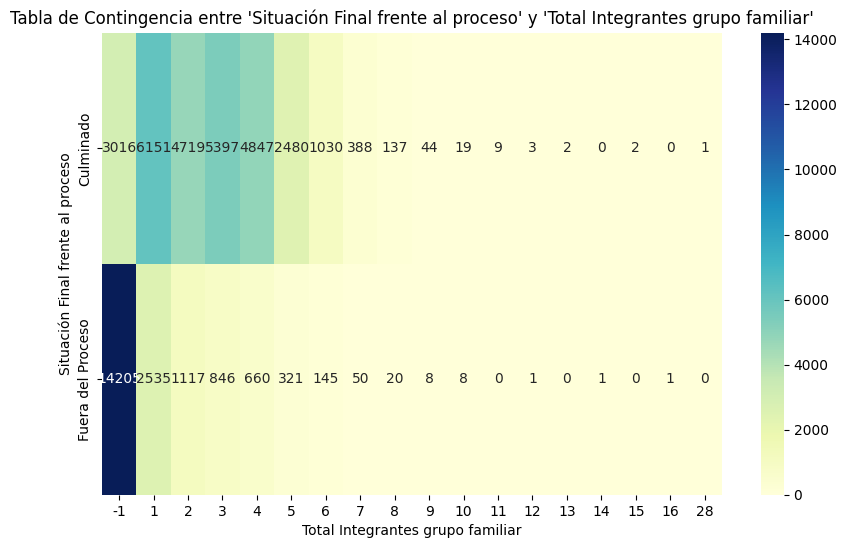

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Posee Censo de Habitabilidad?':
Posee Censo de Habitabilidad?         No     Sí
Situación Final frente al proceso              
Culminado                           2615  25630
Fuera del Proceso                  14075   5843


Estadístico Chi-cuadrado: 19447.948034480225
Valor p: 0.0
Cramer's V: 0.6354481612884457

--------------------



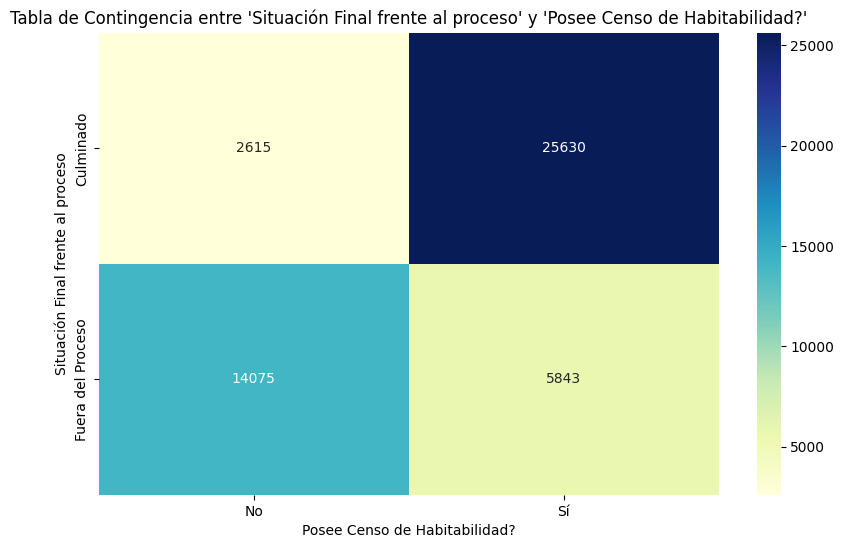

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Tipo de Vivienda':
Tipo de Vivienda                   <No Aplica>  <No Registra>  Apartamento  \
Situación Final frente al proceso                                            
Culminado                                 2615              2         4674   
Fuera del Proceso                        14075              0         1060   

Tipo de Vivienda                    Casa  Casa-Lote  Cuarto(s)  Finca  \
Situación Final frente al proceso                                       
Culminado                          16696        616        804    913   
Fuera del Proceso                   3207        160        200    281   

Tipo de Vivienda                   Habitación  Otro  \
Situación Final frente al proceso                     
Culminado                                 809    69   
Fuera del Proceso                         549    45   

Tipo de Vivienda                   Otro tipo de vivienda (carpa, tienda, vagón, embarca

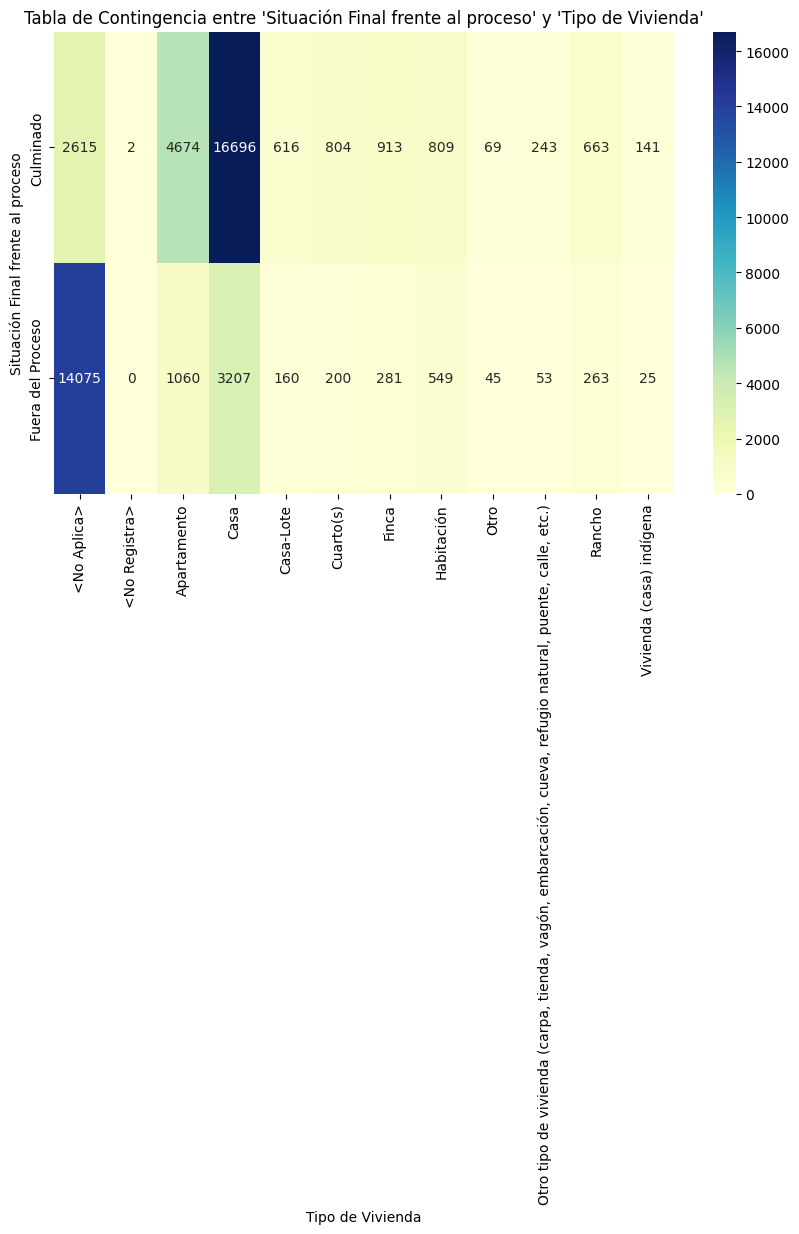

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Régimen de tenencia Vivienda':
Régimen de tenencia Vivienda       <No Aplica>  <No Registra>  \
Situación Final frente al proceso                               
Culminado                                 2615              1   
Fuera del Proceso                        14075              0   

Régimen de tenencia Vivienda       Con permiso del propietario, sin pago alguno  \
Situación Final frente al proceso                                                 
Culminado                                                                  3492   
Fuera del Proceso                                                           602   

Régimen de tenencia Vivienda       En arriendo o subarriendo  Es usufructo  \
Situación Final frente al proceso                                            
Culminado                                              11925           992   
Fuera del Proceso                                       3246           347

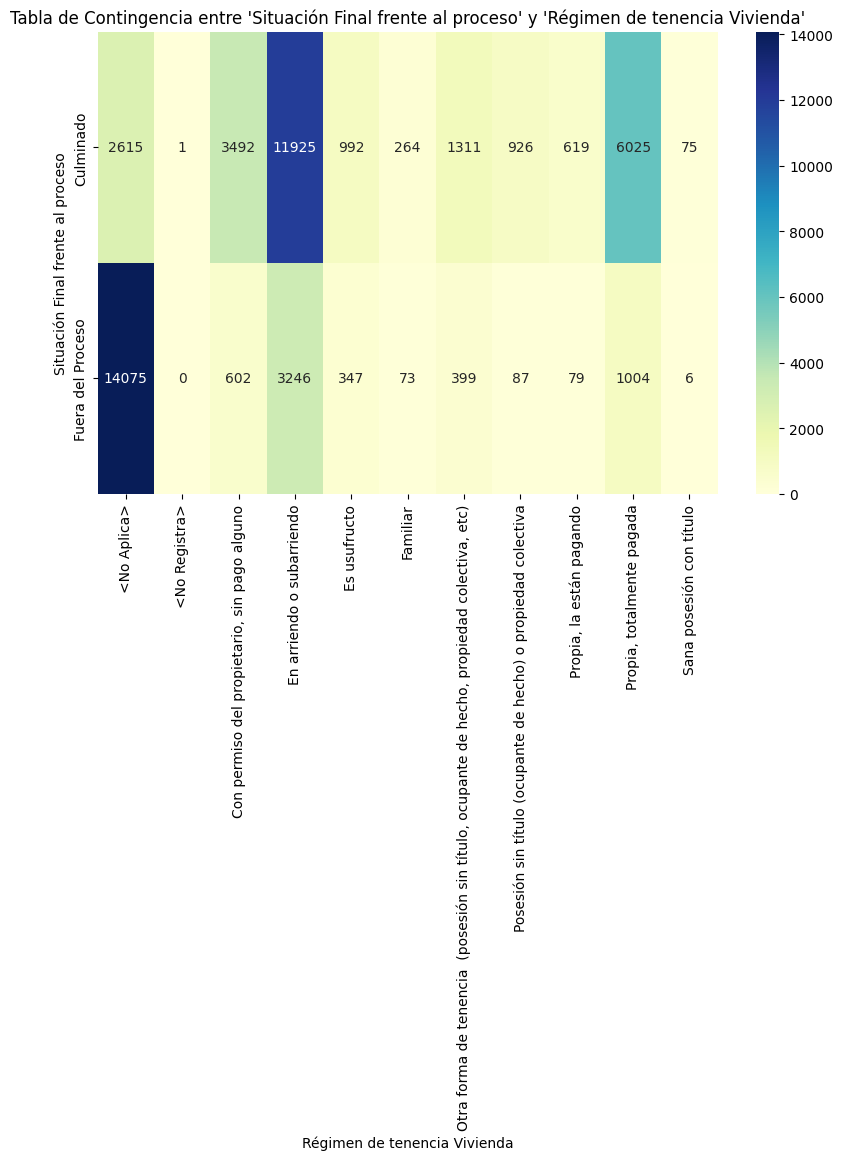

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Posee Serv. Públicos Básicos':
Posee Serv. Públicos Básicos       <No Aplica>    No     Sí
Situación Final frente al proceso                          
Culminado                                 2615  8743  16887
Fuera del Proceso                        14075  2019   3824


Estadístico Chi-cuadrado: 19450.916962648596
Valor p: 0.0
Cramer's V: 0.6354966632678202

--------------------



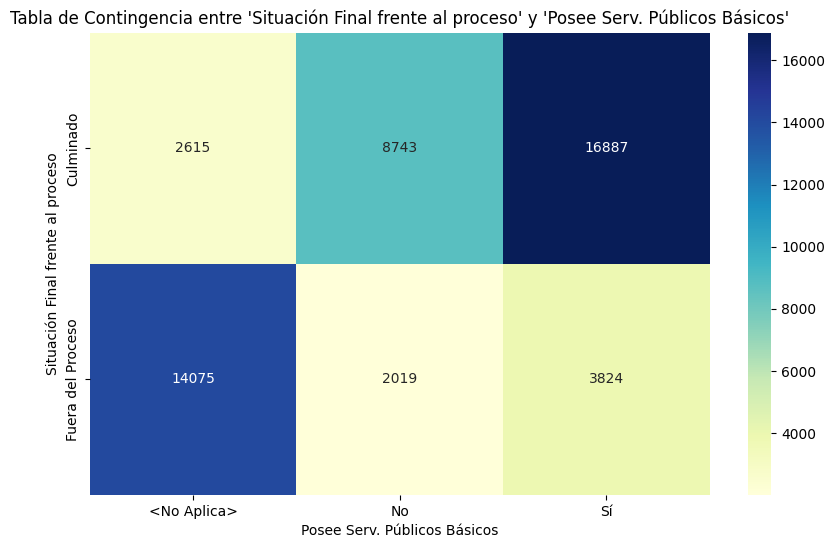

Tabla de Contingencia entre 'Situación Final frente al proceso' y 'Régimen de salud':
Régimen de salud                   <No Registra>  C - CONTRIBUTIVO  \
Situación Final frente al proceso                                    
Culminado                                   3435              9715   
Fuera del Proceso                           6843              3673   

Régimen de salud                   S - SUBSIDIADO  
Situación Final frente al proceso                  
Culminado                                   15095  
Fuera del Proceso                            9402  


Estadístico Chi-cuadrado: 3855.385185659436
Valor p: 0.0
Cramer's V: 0.2829287766953687

--------------------



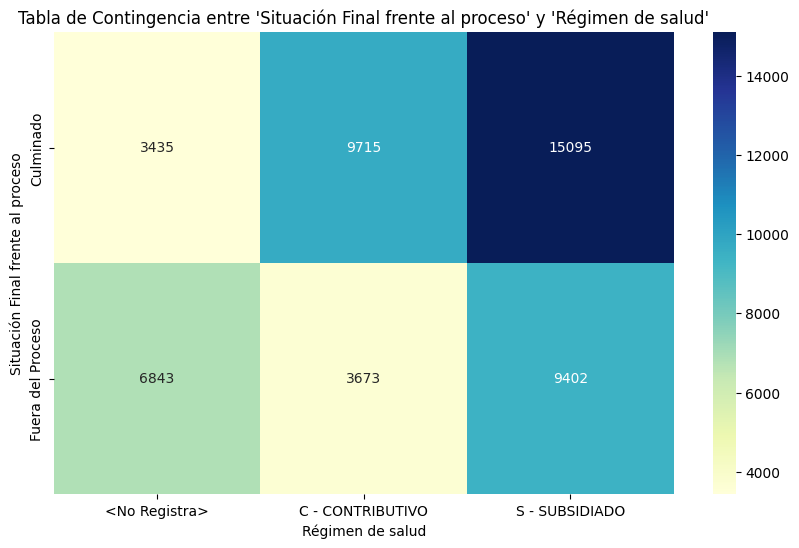

In [ ]:
# Ciclo para generar tablas de contingencia y mapas de calor
for columna in columnas_categoricas:
    # Crear la tabla de contingencia
    tabla_contingencia = pd.crosstab(processed_df['Situación Final frente al proceso'], processed_df[columna])

    # Realizar la prueba de Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

    # Calcular Cramer's V
    V = np.sqrt(chi2 / (tabla_contingencia.sum().sum() * (min(tabla_contingencia.shape) - 1)))

    # Imprimir los resultados
    print(f"Tabla de Contingencia entre 'Situación Final frente al proceso' y '{columna}':")
    print(tabla_contingencia)
    print("\n")
    print(f"Estadístico Chi-cuadrado: {chi2}")
    print(f"Valor p: {p}")
    print(f"Cramer's V: {V}")
    print("\n--------------------\n")

    # Generar el mapa de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt="d")
    plt.title(f"Tabla de Contingencia entre 'Situación Final frente al proceso' y '{columna}'")
    plt.show()

 **Conclusión**: teniendo en cuenta los tres indicadores, podemos afirmar que las variables a continuación tienen la mayor correlación asociada a nuestra variable objetivo:


**DesagregadoDesembolsoBIE**:


*   Estadístico Chi-cuadrado: 35.996,04
*   Valor p: 0.0
*   Cramer's V: 0.8645

**Posee Servicio Social?**:
*   Estadístico Chi-cuadrado: 35.626,25
*   Valor p: 0.0
*   Cramer's V: 0.8600

**Estado de la vinculación ASS**:
*   Estadístico Chi-cuadrado: 35.705,33
*   Valor p: 0.0
*   Cramer's V: 0.8610

**Tipo de ASS Vinculada**:
*   Estadístico Chi-cuadrado: 33.746,65
*   Valor p: 0.0
*   Cramer's V: 0.8370

###Random Forest para analizar relevancia de las variables

Usaremos este segundo método para confirmar o controvertir el análisis del punto anterior.

In [ ]:
#CODIFICACIÓN COLUMNAS
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
for columna in columnas_categoricas:
    processed_df[columna] = label_encoder.fit_transform(processed_df[columna])

In [ ]:
X = processed_df.drop('Situación Final frente al proceso', axis=1)  # Todas las columnas excepto la variable objetivo
y = processed_df['Situación Final frente al proceso']

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Crear un modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
# 3. Obtener la importancia de las variables
importances = model.feature_importances_
# 4. Crear un DataFrame con las variables y su importancia
feature_importances = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importances})

# 5. Ordenar el DataFrame por importancia descendente
feature_importances = feature_importances.sort_values(by='Importancia', ascending=False)

# 6. Mostrar el DataFrame
print(feature_importances)

                            Variable  Importancia
14      Estado de la vinculación ASS     0.205379
15             Tipo de ASS Vinculada     0.176837
11          DesagregadoDesembolsoBIE     0.164592
13            Posee Servicio Social?     0.103424
23      Posee Serv. Públicos Básicos     0.045239
9                     Desembolso BIE     0.036003
21                  Tipo de Vivienda     0.034112
20     Posee Censo de Habitabilidad?     0.033131
12                       Estado ISUN     0.032195
10              Tipo de BIE Accedido     0.030964
8                 OcupacionEconomica     0.028858
22      Régimen de tenencia Vivienda     0.026700
18                       N° de Hijos     0.013430
3     Año de Independización/Ingreso     0.010908
5                    Nivel Educativo     0.008926
2                Año desmovilización     0.008532
7    Línea de FpT para el Máx. Nivel     0.007077
19  Total Integrantes grupo familiar     0.006191
6         Máximo Nivel FpT Reportado     0.005513


Podemos confirmar que el análisis de las tablas de contigencia es acertado.

Se determina que las columnas más relevantes para la clasificación de la variable objetivo son:
  * Estado de la vinculación ASS
  * Tipo de ASS Vinculada
  * DesagregadoDesembolsoBIE
  * Posee Servicio Social?

In [ ]:
columnas_a_eliminar = [
    'Posee Serv. Públicos Básicos',
    'Desembolso BIE',
    'Tipo de Vivienda',
    'Régimen de tenencia Vivienda',
    'Tipo de Desmovilización',
    'Ex Grupo',
    'Año de Independización/Ingreso',
    'Año desmovilización',
    'Grupo Etario',
    'Régimen de salud',
    'Estado ISUN',
    'Tipo de BIE Accedido',
    'Línea de FpT para el Máx. Nivel',
    'Máximo Nivel FpT Reportado',
    'Nivel Educativo',
    'Posee Censo de Familia?',
    'N° de Hijos',
    'OcupacionEconomica',
    'Posee Cónyuge o Compañero(a)?',
    'Posee Censo de Habitabilidad?',
    'Total Integrantes grupo familiar'
    ]

processed_df = processed_df.drop(columns=columnas_a_eliminar)
processed_df.head()

Situación Final frente al proceso  DesagregadoDesembolsoBIE  \
0                                  0                         3   
1                                  0                         3   
2                                  0                         3   
3                                  0                         3   
4                                  0                         3   

   Posee Servicio Social?  Estado de la vinculación ASS  Tipo de ASS Vinculada  
0                       1                             3                      1  
1                       1                             3                      3  
2                       1                             3                      2  
3                       1                             3                      3  
4                       1                             3                      4

Recordemos que para ejecutar el algoritmo de Random Forest fue necesario codificar las columnas, por tanto sus valores ahora son númericos. Esta es la forma final del dataset que usaremos para la red neuronal.

In [ ]:
processed_df.shape

(48163, 5)

#Partición de datos

Vamos a divir los datos en tres grupos: entrenamiento, validación y test.

In [ ]:
df_final = processed_df

In [ ]:
X = df_final.drop('Situación Final frente al proceso', axis=1)  # Todas las columnas excepto la variable objetivo
y = df_final['Situación Final frente al proceso']

In [ ]:
# Primero, dividir en entrenamiento y el resto (test + validación)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Luego, dividir el resto en validación y test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de validación (X_val): {X_val.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (33714, 4)
Tamaño del conjunto de validación (X_val): (7224, 4)
Tamaño del conjunto de prueba (X_test): (7225, 4)


#Red Neuronal con Keras

La arquitectura de la red neuronal será de dos capas ocultas, de 128 y 64 neuronas correspondientemente, y una capa de salida binaria que utiliza la función de activación sigmoide.

In [ ]:
#Construcción del modelo
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

In [ ]:
# Obtener la pérdida y el accuracy de entrenamiento y validación del historial
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

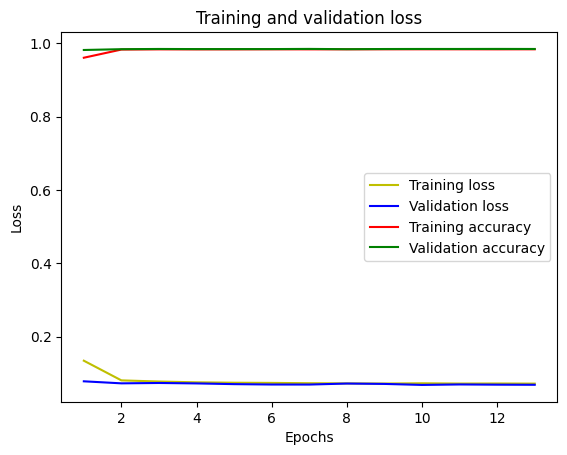

In [ ]:
# Graficar loss y accuracy en conjunto
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

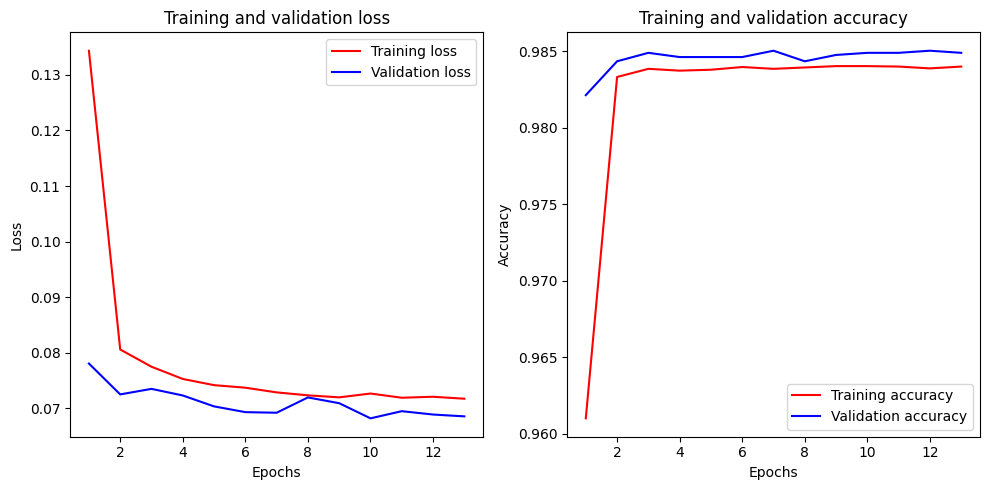

In [ ]:
# Gráfica loss y accuracy por separado
plt.figure(figsize=(10, 5))

#Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9857439446366782
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4238
           1       0.99      0.97      0.98      2987

    accuracy                           0.99      7225
   macro avg       0.99      0.98      0.99      7225
weighted avg       0.99      0.99      0.99      7225



<Axes: >

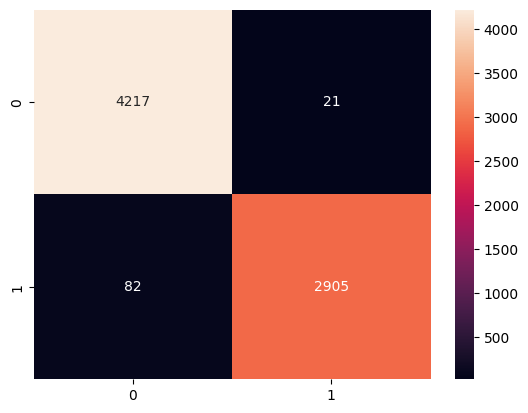

In [ ]:
#Matriz de confusión
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

Gracias a la matriz de confusión podemos determinar que las predicciones hechas por la red neural tienen un margen de error bastante bajo.

In [ ]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
roc_auc = auc(fpr, tpr)

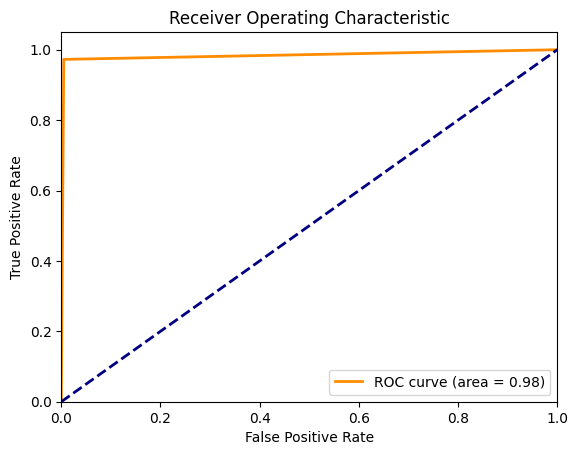

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

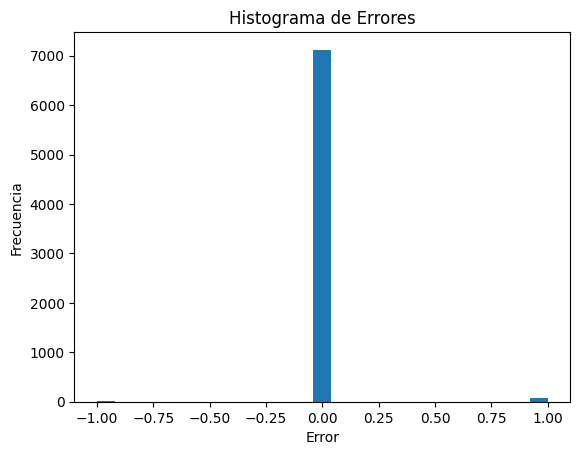

In [ ]:
#histograma de errores
errors = y_test - y_pred.flatten()
plt.hist(errors, bins=25)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores")
plt.show()

#Conclusión

Una red neuronal construída en Keras con un diseño de dos capas ocultas, de 128 y 64 neuronas correspondientemente, que usan la función de activación ReLu y una capa de salida de una neurona para clasificación binaria usando la función sigmoide tiene un accuracy de 98% para predecir la situación final frente al proceso de desmovilización de un ex integrante de grupos armados.

Para alcanzar esta métrica es necesario discriminar y transformar los datos. Un hallazgo importante es que las variables del dataset proporcionado por la ARN que son relevantes para la predicción de nuestra variable objetivo son aquellas relacionadas a las actividades de servicio social que propone la agencia. Estas variables son tres: 'Estado de la vinculación ASS', 'Tipo de ASS Vinculada' y 'Posee Servicio Social?', donde 'ASS' significa Acción de Servicio Social.
Asimismo, una caracterización sobre el estado del individuo en el Beneficio de Inserción Económica.

Asimismo, al analizar los resultados obtenidos en los[ modelos supervisados de clasificación de machine learning](https://colab.research.google.com/drive/1edGTKjMd8bmvQ9DIPpgdCeCRG4gkZnFu) podemos concluir que la red neural aquí expuesta tiene un mejor rendimiento que dichos modelos.

#Bibliografía

###Prompts usados con Gemini:

*   Analizar la distribucion y frecuencia en un conjunto de datos.
* ¿Cómo analizar la correlación entre variables categoricas usando tablas de contingencia?
*   ¿Cómo graficar un histograma de errores usando matplotlib?
*   Calcular y gracias la curva ROC en Python.